In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycm==3.1
!pip install PyWavelets
!pip install https://github.com/neuropsychology/neurokit/zipball/master
!pip install catboost
!pip install lightgbm

In [ ]:
!pip install missingno
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.3 MB/s 


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Library

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import pytz
import os
import matplotlib.pyplot as plt
from scipy import signal
import csv
import seaborn as sns
from pylab import rcParams
from matplotlib import rc 
from pandas.plotting import register_matplotlib_converters
import keras
from sklearn.model_selection import train_test_split
import pywt
import time
import scipy.io as sio
from IPython.display import display
import sys

import pywt
import scipy.stats

import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from collections import defaultdict, Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
from pycm import *
from PIL import Image

from sklearn.model_selection import GroupShuffleSplit
from re import A
import matplotlib.pyplot as plt

# Building the Model
import os
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv1D, MaxPool1D, MaxPool2D, Flatten, LSTM, Conv2D, Reshape, Bidirectional, Layer, concatenate, Flatten, Lambda, Concatenate
from keras.layers import Dropout, Dense, TimeDistributed, BatchNormalization, GlobalMaxPool2D, LeakyReLU,AveragePooling2D,GlobalAveragePooling2D
from keras.models import Sequential
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, precision_recall_fscore_support, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from pycm import *
import collections, functools, operator

from sklearn.decomposition import PCA

from sklearn.utils import shuffle

import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier

from keras import optimizers
from sklearn import preprocessing

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

#for feature selection
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#for parameter optimization
from sklearn.model_selection import GridSearchCV
#reading the dataset

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,  GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.layers import Input, Reshape, Dropout, Dense 

ModuleNotFoundError: ignored

### Plotting Signals 

In [ ]:
def plotme(data):
        plt.figure(figsize=(20,8))
        plt.subplot(211)
        plt.plot(data)
        plt.show()
  

# ECG

### Loading data

In [ ]:
X = np.load('/content/drive/MyDrive/P13-ExplainHeart/afdb_signals_original_hrv.npy', allow_pickle=True)
Y = np.load('/content/drive/MyDrive/P13-ExplainHeart/afdb_signals_labels_hrv.npy', allow_pickle=True)
X_down = np.load('/content/drive/MyDrive/P13-ExplainHeart/afdb_signals_downsampled_50hz_hrv.npy', allow_pickle=True)

In [ ]:
Y.shape
X_down.shape

(16888,)

In [ ]:
from collections import Counter
counter = Counter(Y)
print("Train Labels"  +  str(counter))

Train LabelsCounter({'N': 11737, 'AFIB': 5151})


## HRV Optional 

In [ ]:
hrv = pd.read_csv("/content/drive/MyDrive/P13-ExplainHeart/hrv_afdb_version1.csv")
hrv.replace({'AFIB': 1, 'N': 0, 'AFL':'x', 'J':'x'}, inplace=True)
hrv.replace([np.inf, -np.inf], np.nan, inplace=True)
# mask = hrv.loc[hrv.Class == 'x'].index.tolist()
# print(len(mask))
# print(mask)
# hrv.drop(index=mask, inplace=True)
independent = hrv.copy().astype('float64')
hrv.drop('Class',axis=1, inplace=True)
print(hrv.shape)

(16888, 26)


In [ ]:
independent[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD", "Class"]].describe().to_csv("/content/drive/MyDrive/P13-ExplainHeart/metadata_ECG_full.csv")

# New Section

In [ ]:


import pandas as pd
from sklearn import preprocessing
x = hrv.iloc[50][["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]].values
print(x)
min_max_scaler = preprocessing.StandardScaler()
x =  x.reshape((6, -1))
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled)
df = pd.DataFrame({"Variable":x_scaled.reshape(6),"Name": ["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]})
df.head()


[88.956       0.2118     98.68421053 98.68421053  1.84066818  0.44206202]
[[ 0.86083096]
 [-1.01067015]
 [ 1.06598641]
 [ 1.06598641]
 [-0.97631941]
 [-1.00581422]]


Variable   Name
0  0.860831  madNN
1 -1.010670  mcvNN
2  1.065986  pnn50
3  1.065986  pnn20
4 -0.976319   SHAN

In [ ]:
import plotly.express as px
fig = px.line_polar(df, r="Variable", theta='Name', line_close=True)

fig.show()

SHAN        0.414251
mcvNN       0.392498
pnn20       0.352056
pnn50       0.347688
CD          0.338911
madNN       0.318272
FUZZY       0.267259
cvnn        0.258988
cvsd        0.258501
LZC         0.253240
sampen      0.226342
rmssd       0.215716
SDSD        0.215359
cvi         0.214853
cvi_m       0.207493
medianNN    0.207108
sdnn        0.189562
meanRR      0.175368
KFD         0.158573
MSE         0.122191
CMSE        0.110926
csi         0.093901
DFA         0.083525
TINN        0.078290
apen        0.055187
HFD         0.049614
dtype: float64


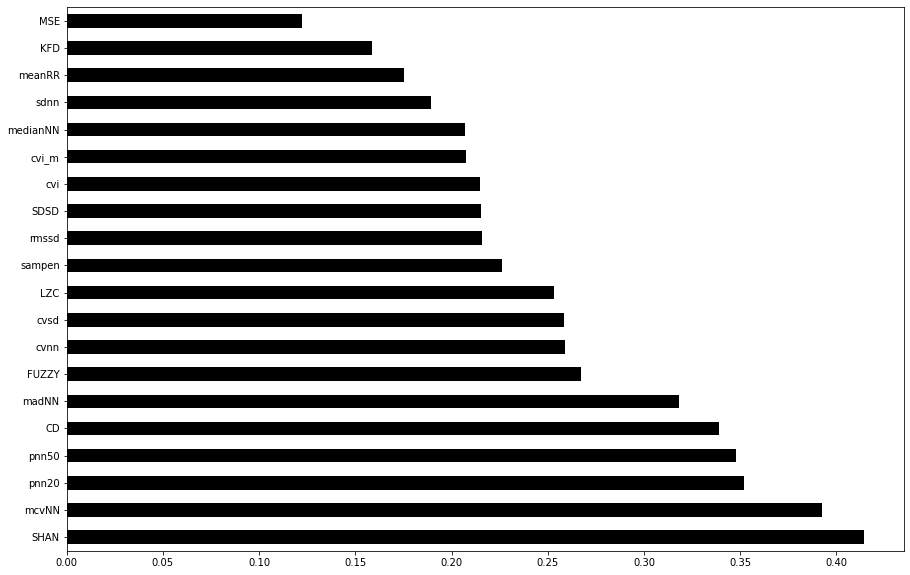

In [ ]:
#Mutual Information Gain

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile

independent.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
Y = independent['Class']


independent.drop('Class',axis=1, inplace=True)

mutual_info = mutual_info_classif(independent, Y)
mutual_info = pd.Series(mutual_info)
corr_mi = mutual_info.index
mutual_info.index = independent.columns
mutual_info = mutual_info.sort_values(ascending=False)
print(mutual_info)
plt.figure(figsize=(15,10))
mutual_info.nlargest(20).sort_values(ascending=False).plot.barh(color='#000000')
plt.show()

In [ ]:
hrv

rmssd      meanRR        sdnn      cvnn      cvsd  medianNN  \
0      216.133583  568.461538  196.133054  0.345024  0.380208     540.0   
1      309.319028  622.553191  238.860229  0.383678  0.496856     540.0   
2      254.438854  619.148936  201.514157  0.325470  0.410949     560.0   
3      310.962815  598.333333  223.733631  0.373928  0.519715     560.0   
4      354.272622  647.111111  249.987474  0.386313  0.547468     560.0   
...           ...         ...         ...       ...       ...       ...   
16883   96.382857  717.288136  111.383626  0.155284  0.134371     760.0   
16884  316.982903  550.909091  226.658061  0.411426  0.575382     480.0   
16885   32.549339  760.000000   29.408585  0.038696  0.042828     760.0   
16886  103.824309  731.000000  105.534051  0.144369  0.142031     760.0   
16887   66.061355  729.620253   88.222374  0.120915  0.090542     760.0   

         madNN     mcvNN      pnn50      pnn20  ...      TINN      SHAN  \
0      148.260  0.274556  78.846154  82.692308  ...   15.6250  4.048703   
1      326.172  0.604022  78.723404  82.978723  ...    0.0000  3.713199   
2      207.564  0.370650  80.851064  89.361702  ...  265.6250  4.149993   
3      281.694  0.503025  77.083333  85.416667  ...    0.0000  4.019103   
4      296.520  0.529500  77.777778  84.444444  ...   15.6250  4.500093   
...        ...       ...        ...        ...  ...       ...       ...   
16883   29.652  0.039016  15.254237  20.338983  ...  398.4375  2.244508   
16884  177.912  0.370650  75.000000  81.818182  ...   62.5000  4.552111   
16885    0.000  0.000000   7.894737  10.526316  ...  140.6250  1.661671   
16886   29.652  0.039016  10.000000  17.500000  ...  398.4375  2.054163   
16887   29.652  0.039016   5.063291  10.126582  ...    0.0000  1.643899   

          FUZZY       MSE      CMSE        CD       HFD       KFD       LZC  \
0      1.274896  0.635958  0.502873  1.190897  1.810014  3.019771  1.205862   
1      1.307193  0.210930  0.271262  0.779426  1.968554  3.122995  1.063645   
2      1.459176  0.000000  0.691179  1.200786  1.895063  3.675820  0.945462   
3      1.577429  0.641237  0.601431  1.416512  1.954358  3.028490  1.163534   
4      1.658522  0.601092  0.819959  1.344153  1.993322  6.277603  1.098371   
...         ...       ...       ...       ...       ...       ...       ...   
16883  0.462589  0.085530  0.088072  0.467625  1.910018  1.641012  0.498529   
16884  1.336256  1.325580  1.310525  1.351464  2.008991  3.253134  1.101039   
16885  1.008360  0.000000  0.447668  0.906982  2.009274  1.488858  0.966723   
16886  0.428509  0.036172  0.048593  0.490787  1.887009  1.539172  0.399145   
16887  0.415589  0.143194  0.574353  0.320859  1.816641  1.451190  0.319179   

            DFA  
0      1.031869  
1      0.745389  
2      0.726736  
3      0.485384  
4      0.452838  
...         ...  
16883  0.901139  
16884  0.590600  
16885  0.530219  
16886  0.958856  
16887  1.035240  

[16888 rows x 26 columns]

In [ ]:
["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]

In [ ]:
hrv.isnull().sum() / hrv.shape[0] * 100.00

rmssd       0.000000
meanRR      0.000000
sdnn        0.000000
cvnn        0.000000
cvsd        0.000000
medianNN    0.000000
madNN       0.000000
mcvNN       0.000000
pnn50       0.000000
pnn20       0.000000
csi         0.000000
sampen      6.862861
apen        0.000000
cvi         0.000000
cvi_m       0.000000
SDSD        0.000000
TINN        0.000000
SHAN        0.000000
FUZZY       0.000000
MSE         4.814069
CMSE        5.613453
CD          0.000000
HFD         0.183562
KFD         0.011843
LZC         0.000000
DFA         0.000000
dtype: float64

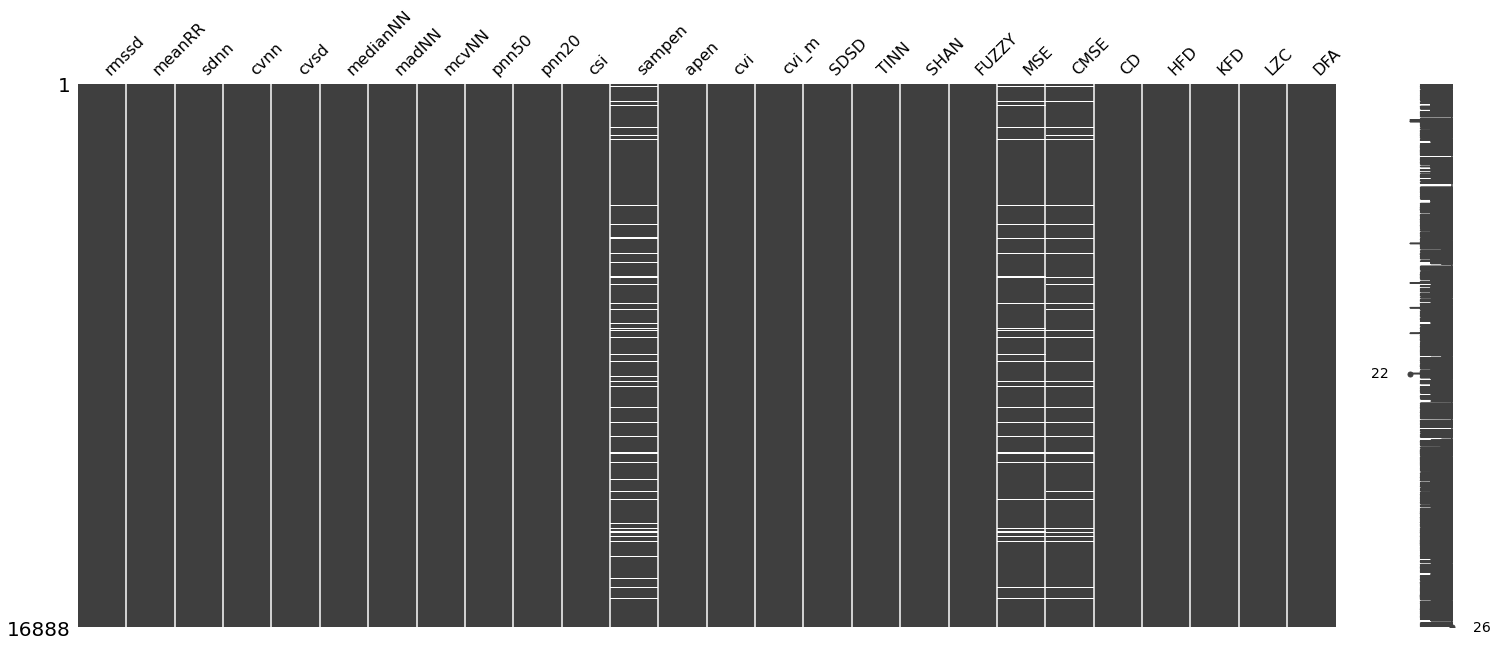

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(hrv.sample(16888))

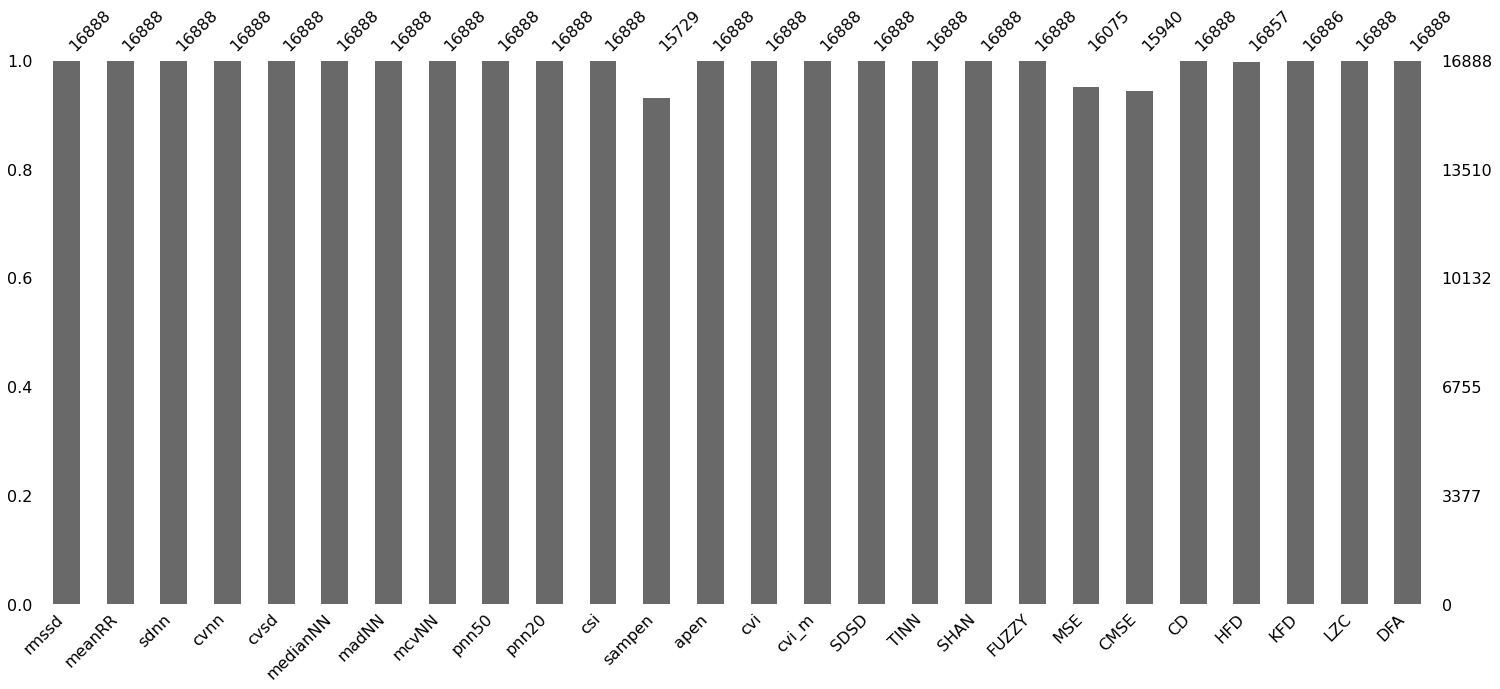

In [ ]:
msno.bar(hrv.sample(16888))

In [ ]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from missingpy import MissForest
imputer = MissForest()
hrv_imputed = imputer.fit_transform(hrv)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 2


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 3


In [ ]:
hrv_imputed.shape

(16888, 26)

# Standard Neural Networks (Sequential)

### Attention Layer

In [ ]:
from tensorflow.keras.layers import Layer, RepeatVector
from tensorflow.keras import backend as K

class Attention(Layer):
    
    def __init__(self, return_sequences=True, **kwargs):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'return_sequences': self.return_sequences 
      })
      return config


## 1D CNN-BIlstm with Attention

In [ ]:
def cnn_bilstm_attn(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2], 1)

  model = Sequential()
  
  model.add(TimeDistributed(Conv1D(filters=32, kernel_size=(3), activation='relu', padding="same"), input_shape=input_shape))
  model.add(TimeDistributed(BatchNormalization(momentum=0.9)))
  model.add(TimeDistributed(Dropout(0.3)))
  model.add(TimeDistributed(Flatten()))
  model.add(Bidirectional(LSTM(32, return_sequences=True)))
  model.add(Attention(return_sequences=False))
  model.add(Dropout(0.2))
  model.add((Dense(32, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D CNN-lstm with Attention

In [ ]:
def cnn_lstm(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2], 1)

  model = Sequential()
  
  model.add(TimeDistributed(Conv1D(filters=32, kernel_size=(3), activation='relu', padding="same"), input_shape=input_shape))
  model.add(TimeDistributed(BatchNormalization(momentum=0.9)))
  model.add(TimeDistributed(Dropout(0.3)))
  model.add(TimeDistributed(Flatten()))
  # model.add(Bidirectional(LSTM(32, return_sequences=True)))
  model.add((LSTM(32, return_sequences=False)))
  # model.add(Attention(return_sequences=False))
  model.add(Dropout(0.2))
  model.add((Dense(32, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D LSTM

In [ ]:
def lstm_vanilla(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2])

  model =  Sequential()
  model.add((LSTM(128, return_sequences=True, input_shape=input_shape)))
  model.add((LSTM(64, return_sequences=True)))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Dense(64, activation='relu')))
  model.add(TimeDistributed(Dense(32, activation='relu')))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add((Dense(32, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D BiLSTM 

In [ ]:
def lstm_bidirection(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2])

  model =  Sequential()
  model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=input_shape)))
  model.add(Bidirectional(LSTM(64, return_sequences=True)))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Dense(64, activation='relu')))
  model.add(TimeDistributed(Dense(32, activation='relu')))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add((Dense(32, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D CNN

In [ ]:
def cnn_1d(X_in,out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  input_shape = (X_in[0].shape[0], 1)

  model = Sequential()
  

  model.add(keras.layers.Conv1D(32, 3, padding='same', input_shape=input_shape, activation='relu', dilation_rate=4))
  model.add(BatchNormalization(momentum=0.9))

  model.add(keras.layers.Conv1D(64, 3, padding='same', input_shape=input_shape, activation='relu', dilation_rate=2))
  model.add(BatchNormalization(momentum=0.9))

  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.MaxPooling1D(pool_size=2))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation = 'relu'))
  model.add(keras.layers.Dense(out_classes, activation = final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  
  # model.summary()
  return model

# Multi-Modal Models

In [ ]:
def mm_cnn_bilstm_attn(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed(Conv1D(filters=32, kernel_size=(3), activation='relu', padding="same"))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.9))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(32, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = Dense(32, activation='relu')(x)
 x = Dense(1, activation='sigmoid')(x)

 model = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(model.summary())
 return model

In [ ]:
! pip install -q tensorflow-model-optimization

     |████████████████████████████████| 237 kB 7.9 MB/s 


In [ ]:
LastValueQuantizer = tfmot.quantization.keras.quantizers.LastValueQuantizer
MovingAverageQuantizer = tfmot.quantization.keras.quantizers.MovingAverageQuantizer

class DefaultDenseQuantizeConfig(tfmot.quantization.keras.QuantizeConfig):
    # Configure how to quantize weights.
    def get_weights_and_quantizers(self, layer):
      return [(layer.kernel, LastValueQuantizer(num_bits=8, symmetric=True, narrow_range=False, per_axis=False))]

    # Configure how to quantize activations.
    def get_activations_and_quantizers(self, layer):
      return [(layer.activation, MovingAverageQuantizer(num_bits=8, symmetric=False, narrow_range=False, per_axis=False))]

    def set_quantize_weights(self, layer, quantize_weights):
      # Add this line for each item returned in `get_weights_and_quantizers`
      # , in the same order
      layer.kernel = quantize_weights[0]

    def set_quantize_activations(self, layer, quantize_activations):
      # Add this line for each item returned in `get_activations_and_quantizers`
      # , in the same order.
      layer.activation = quantize_activations[0]

    # Configure how to quantize outputs (may be equivalent to activations).
    def get_output_quantizers(self, layer):
      return []

    def get_config(self):
      return {}

In [ ]:
import tensorflow_model_optimization as tfmot

quantize_annotate_layer = tfmot.quantization.keras.quantize_annotate_layer
quantize_annotate_model = tfmot.quantization.keras.quantize_annotate_model
quantize_scope = tfmot.quantization.keras.quantize_scope


def mm_cnn_bilstm_attn_quant(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed((Conv1D(filters=32, kernel_size=(3), activation='relu', padding="same")))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.9))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(32, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = tfmot.quantization.keras.quantize_annotate_layer(Dense(32, activation='relu'))(x)
 x = tfmot.quantization.keras.quantize_annotate_layer(Dense(1, activation='sigmoid'))(x)

 model = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 model = tfmot.quantization.keras.quantize_apply(model)
 with quantize_scope(
  {'DefaultDenseQuantizeConfig': DefaultDenseQuantizeConfig,
   'Attention':Attention(return_sequences=False)}):
  # Use `quantize_apply` to actually make the model quantization aware.
  quant_aware_model = tfmot.quantization.keras.quantize_apply(model)
  
 model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(model.summary())

In [ ]:
def mm_cnn_lstn_simple_ecg(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed(Conv1D(filters=4, kernel_size=(3), activation='relu', padding="same"))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.4))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(2, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = Dense(4, activation='relu')(x)
 x = Dense(1, activation='sigmoid')(x)

 model = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(model.summary())
 return model

In [ ]:
def mm_cnn_lstn_simple_ecg_duplicate(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed(Conv1D(filters=4, kernel_size=(3), activation='relu', padding="same"))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.4))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(2, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = Dense(4, activation='relu')(x)
 x = Dense(1, activation='sigmoid')(x)

 dmodel = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 dmodel.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(dmodel.summary())
 return dmodel

## Data Homogenization

In [ ]:
hrv_numpy = hrv[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]].to_numpy()
print(hrv_numpy.shape)

(16888, 6)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_signals_data = []
X_signals_downsampled = []
y = []
hrv_data = []

lab_dict = {'AFIB':1, 'N':0}

#original = 3840
for x, lab, k, h in zip(X, Y, X_down, hrv_numpy):
    mult = int(k.shape[0] / 1500)
    if lab == 'AFIB' or lab  == 'N':
      if mult > 1:
        for i in range(mult):
          # X_signals_data.append(x[7500*i:7500*(i+1)])
          if metrics != 0:
            X_signals_downsampled.append(k[1500*i:1500*(i+1)])
            y.append(lab_dict[lab])
            hrv_data.append(h)
      else:
            X_signals_downsampled.append(k[:1500])
            y.append(lab_dict[lab])
            hrv_data.append(h)
            # X_signals_data.append(x[:7500])
          

# X_signals_data = np.asarray(X_signals_data).astype(float)
X_signals_downsampled = np.asarray(X_signals_downsampled).astype(float)
# y = le.fit_transform(y)
y = np.asarray(y).astype(float)
hrv_data = np.asarray(hrv_data).astype(float)
# print(X_signals_data.shape)
print(X_signals_downsampled.shape)
print(y.shape)
print(hrv_data.shape)

(16890, 1500)
(16890,)
(16890, 6)


In [ ]:
from collections import Counter
counter = Counter(y)
print("Train Labels"  +  str(counter))

Train LabelsCounter({0.0: 11737, 1.0: 5153})


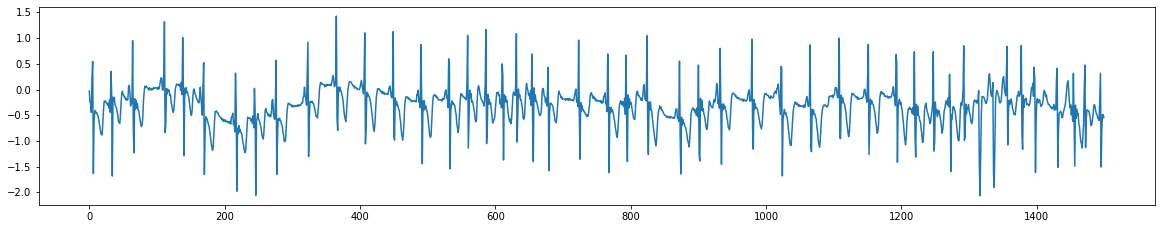

In [ ]:
plotme(X_signals_downsampled[0])

# Single Input Model

In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#cnn_1d, lstm_vanilla, lstm_bidirection, cnn_lstm, cnn_bilstm_attn

 
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
           patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_dnn(x, y, summary=False, plotme=False, strat=2, binary=False, full=False):
  sde = StandardScaler()
  # x = x.reshape(x.shape[0], int(x.shape[1]/150), 150) #for LSTM
  if full == True:
    model_name = 'trained_cnnlstm_50hz_FULL'
    model = cnn_bilstm_attn(x)
    x_to_train = sde.fit_transform(x.reshape(x.shape[0], -1)).reshape(x.shape)
    model.fit(x, y, epochs=10, batch_size=16, callbacks = callbacks, verbose=1)
    #saving
    atten_model_json = model.to_json()
    with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
        json_file.write(atten_model_json)
    # serialize weights to HDF5
    model.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))


  metrics_one = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()

  x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

      model = cnn_1d(x)
      
      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]
     
      x_original, x_holdout, y_original, y_holdout = train_test_split(x_train, y_train, test_size=0.20, shuffle=False, random_state=69)



      x_original = sde.fit_transform(x_original.reshape(x_original.shape[0], -1)).reshape(x_original.shape)

      x_holdout = sde.transform(x_holdout.reshape(x_holdout.shape[0], -1)).reshape(x_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      history = model.fit(x_original, y_original, epochs=10, batch_size=16, validation_data=(x_holdout, y_holdout), callbacks = callbacks, verbose=1)
      epoch_elapsed = time.time()-epoch_start

      y_pred = model.predict(x_test)
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            # print(cm)
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            

      metrics_one['Accuracy'].append(cm1.class_stat['ACC'][1])
      metrics_one['Sensitivity'].append(cm1.class_stat['TPR'][1])
      metrics_one['Specificity'].append(cm1.class_stat['TNR'][1])
      metrics_one['F1-Score'].append(cm1.class_stat['F1'][1])
      metrics_one['MCC'].append(cm1.class_stat['MCC'][1])
      metrics_one['PPV'].append(cm1.class_stat['PPV'][1])
      metrics_one['NPV'].append(cm1.class_stat['NPV'][1])
      print('F1-Score:', float(cm1.class_stat['F1'][1]*100))


      model_name = 'trained_cnnlstm_50hz_{}'.format(float(cm1.class_stat['F1'][1]*100))
      #saving
      atten_model_json = model.to_json()
      with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
          json_file.write(atten_model_json)
      # serialize weights to HDF5
      model.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))
      # model.save('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
       


  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in metrics_one['Accuracy']])
            sigma = np.std([x for x in metrics_one['Accuracy']])
            metrics_one['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in metrics_one['Sensitivity']])
            sigma = np.std([x for x in metrics_one['Sensitivity']])
            metrics_one['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in metrics_one['Specificity']])
            sigma = np.std([x for x in metrics_one['Specificity']])
            metrics_one['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in metrics_one['F1-Score']])
            sigma = np.std([x for x in metrics_one['F1-Score']])
            metrics_one['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in metrics_one['MCC']])
            sigma = np.std([x for x in metrics_one['MCC']])
            metrics_one['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in metrics_one['PPV']])
            sigma = np.std([x for x in metrics_one['PPV']])
            metrics_one['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in metrics_one['NPV']])
            sigma = np.std([x for x in metrics_one['NPV']])
            metrics_one['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("MODEL-------------")
  print(metrics_one)   



Epoch 1/10
676/676 [==============================] - 13s 5ms/step - loss: 0.1454 - accuracy: 0.9464 - val_loss: 0.0882 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 2/10
676/676 [==============================] - 3s 5ms/step - loss: 0.1070 - accuracy: 0.9613 - val_loss: 0.0699 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 3/10
669/676 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9656
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
676/676 [==============================] - 3s 5ms/step - loss: 0.0938 - accuracy: 0.9658 - val_loss: 0.0879 - val_accuracy: 0.9634 - lr: 0.0010
Epoch 4/10
666/676 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9720
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
676/676 [==============================] - 3s 5ms/step - loss: 0.0791 - accuracy: 0.9718 - val_loss: 0.0800 - val_accuracy: 0.9671 - lr: 5.0000e-04
Epoch 5/10
676/676 [==============================] -

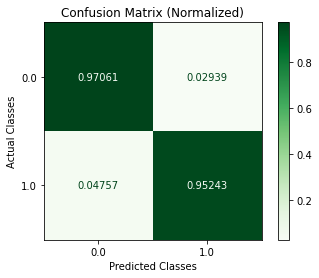

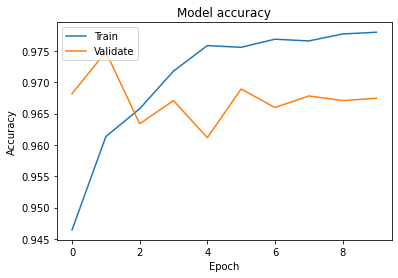

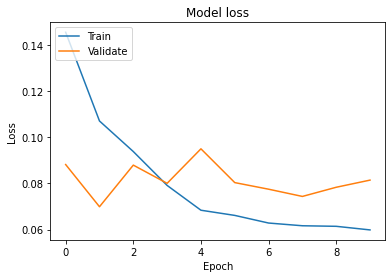

F1-Score: 94.32692307692308
Epoch 1/10
676/676 [==============================] - 5s 5ms/step - loss: 0.1487 - accuracy: 0.9453 - val_loss: 0.1008 - val_accuracy: 0.9586 - lr: 0.0010
Epoch 2/10
676/676 [==============================] - 3s 5ms/step - loss: 0.1086 - accuracy: 0.9567 - val_loss: 0.0842 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 3/10
673/676 [============================>.] - ETA: 0s - loss: 0.1003 - accuracy: 0.9629
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
676/676 [==============================] - 3s 5ms/step - loss: 0.1005 - accuracy: 0.9628 - val_loss: 0.1045 - val_accuracy: 0.9563 - lr: 0.0010
Epoch 4/10
667/676 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9679
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
676/676 [==============================] - 3s 5ms/step - loss: 0.0839 - accuracy: 0.9679 - val_loss: 0.0962 - val_accuracy: 0.9630 - lr: 5.0000e-04
Epoch 5/10
675/676 [======

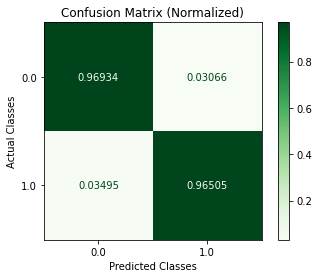

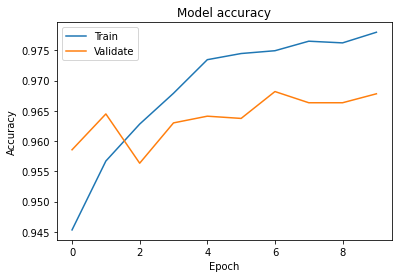

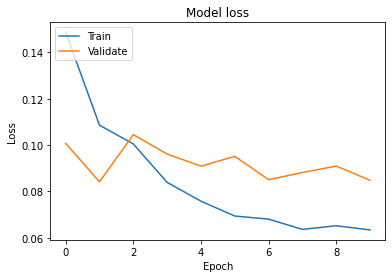

F1-Score: 94.8473282442748
Epoch 1/10
676/676 [==============================] - 4s 5ms/step - loss: 0.1496 - accuracy: 0.9448 - val_loss: 0.1248 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 2/10
676/676 [==============================] - 3s 5ms/step - loss: 0.1143 - accuracy: 0.9572 - val_loss: 0.0926 - val_accuracy: 0.9615 - lr: 0.0010
Epoch 3/10
676/676 [==============================] - 3s 5ms/step - loss: 0.0979 - accuracy: 0.9628 - val_loss: 0.0861 - val_accuracy: 0.9641 - lr: 0.0010
Epoch 4/10
668/676 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0.9661
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
676/676 [==============================] - 3s 5ms/step - loss: 0.0914 - accuracy: 0.9661 - val_loss: 0.0990 - val_accuracy: 0.9652 - lr: 0.0010
Epoch 5/10
665/676 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9712
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
676/676 [===========

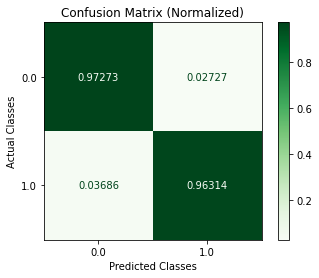

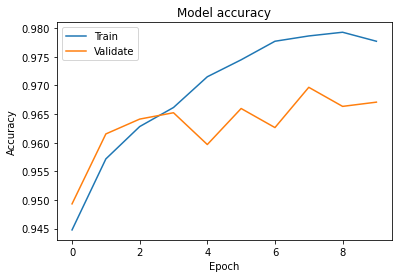

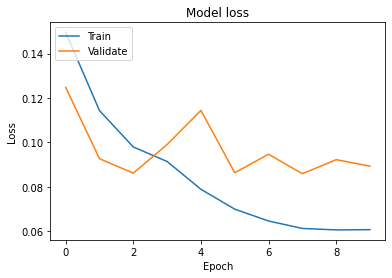

F1-Score: 95.11494252873564
Epoch 1/10
676/676 [==============================] - 4s 5ms/step - loss: 0.1491 - accuracy: 0.9440 - val_loss: 0.1076 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 2/10
671/676 [============================>.] - ETA: 0s - loss: 0.1109 - accuracy: 0.9566
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
676/676 [==============================] - 3s 5ms/step - loss: 0.1103 - accuracy: 0.9569 - val_loss: 0.1280 - val_accuracy: 0.9508 - lr: 0.0010
Epoch 3/10
667/676 [============================>.] - ETA: 0s - loss: 0.0878 - accuracy: 0.9654
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
676/676 [==============================] - 3s 5ms/step - loss: 0.0875 - accuracy: 0.9656 - val_loss: 0.1088 - val_accuracy: 0.9578 - lr: 5.0000e-04
Epoch 4/10
676/676 [==============================] - 3s 5ms/step - loss: 0.0786 - accuracy: 0.9715 - val_loss: 0.0793 - val_accuracy: 0.9711 - lr: 2.5000e-04
Epoch 5/10
665/676 [==

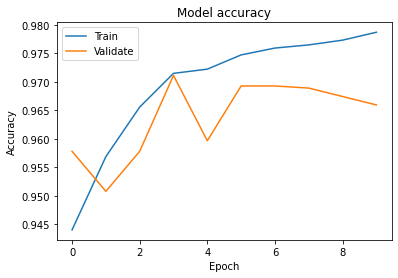

F1-Score: 94.89747257987602
Epoch 1/10
676/676 [==============================] - 4s 5ms/step - loss: 0.1454 - accuracy: 0.9457 - val_loss: 0.1174 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 2/10
666/676 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9577
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
676/676 [==============================] - 3s 5ms/step - loss: 0.1105 - accuracy: 0.9578 - val_loss: 0.1428 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 3/10
676/676 [==============================] - 3s 5ms/step - loss: 0.0891 - accuracy: 0.9648 - val_loss: 0.1012 - val_accuracy: 0.9582 - lr: 5.0000e-04
Epoch 4/10
676/676 [==============================] - 3s 5ms/step - loss: 0.0829 - accuracy: 0.9693 - val_loss: 0.0815 - val_accuracy: 0.9693 - lr: 5.0000e-04
Epoch 5/10
676/676 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9696
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
676/676 [==

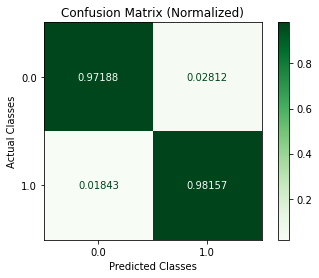

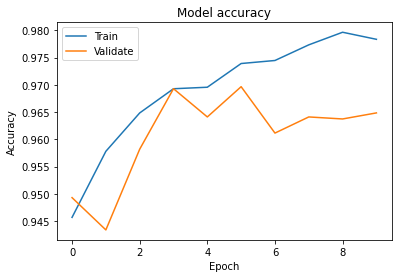

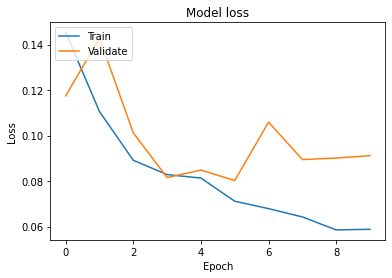

F1-Score: 95.96965386439071
MODEL-------------
{'Accuracy': '0.969+-0.0', 'Sensitivity': '0.965+-0.01', 'Specificity': '0.971+-0.0', 'F1-Score': '0.95+-0.01', 'MCC': '0.928+-0.01', 'AUC': [], 'PPV': '0.936+-0.0', 'NPV': '0.985+-0.0'}


In [ ]:
# kfold_dnn(X_signals_downsampled, y, summary=True, plotme=True, strat=5, binary=True, full=False)
kfold_dnn(hrv_data, y, summary=True, plotme=True, strat=5, binary=True, full=False)

# Double Input Model

In [ ]:
import tempfile

In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow_model_optimization as tfmot
import umap
import umap.plot

#cnn_1d, lstm_vanilla, lstm_bidirection, cnn_lstm, cnn_bilstm_attn

y_pred_running_ecg = []
concat_running_ecg = []
 
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
           patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_dnn_dp(x, x2, y, summary=False, plotme=False, strat=2, binary=False, full=False):
  sde = StandardScaler()
  
  x = x.reshape(x.shape[0], int(x.shape[1]/150), 150) #for LSTM
  if full == True:
    model_name = 'trained_cnnlstm_50hz_FULL'
    model = cnn_bilstm_attn(x)
    x_to_train = sde.fit_transform(x.reshape(x.shape[0], -1)).reshape(x.shape)
    model.fit(x, y, epochs=10, batch_size=16, callbacks = callbacks, verbose=1)
    #saving
    atten_model_json = model.to_json()
    with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
        json_file.write(atten_model_json)
    # serialize weights to HDF5
    model.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))


  metrics_one = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()

  # x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

      model = mm_cnn_bilstm_attn(x, x2)
      
      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        x2_train = x2.iloc[train]
        x2_test = x2.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        x2_train = x2[train]
        x2_test = x2[test]
        y_train = y[train]
        y_test = y[test]
     
 
      x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x_train, x2_train, y_train, test_size=0.2, shuffle=False, random_state=69)

      print(x1_original.shape)

      x1_original = sde.fit_transform(x1_original.reshape(x1_original.shape[0], -1)).reshape(x1_original.shape)

      x1_holdout = sde.transform(x1_holdout.reshape(x1_holdout.shape[0], -1)).reshape(x1_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      sde = StandardScaler()

      x2_original = sde.fit_transform(x2_original)

      x2_holdout = sde.transform(x2_holdout)

      x2_test = sde.transform(x2_test)


      history = model.fit([x1_original,x2_original], y_original, epochs=10, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), callbacks = callbacks, verbose=1)
      epoch_elapsed = time.time()-epoch_start

      y_pred = model.predict([x_test,x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
            

      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            # print(cm)
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

 

            

      metrics_one['Accuracy'].append(cm1.class_stat['ACC'][1])
      metrics_one['Sensitivity'].append(cm1.class_stat['TPR'][1])
      metrics_one['Specificity'].append(cm1.class_stat['TNR'][1])
      metrics_one['F1-Score'].append(cm1.class_stat['F1'][1])
      metrics_one['MCC'].append(cm1.class_stat['MCC'][1])
      metrics_one['PPV'].append(cm1.class_stat['PPV'][1])
      metrics_one['NPV'].append(cm1.class_stat['NPV'][1])
      print('F1-Score:', float(cm1.class_stat['F1'][1]*100))

            
      # float_converter = tf.lite.TFLiteConverter.from_keras_model(model)
      # float_tflite_model = float_converter.convert()
      # _, float_file = tempfile.mkstemp('.tflite')
      # with open(float_file, 'wb') as f:
      #   f.write(float_tflite_model)


      model_name = 'new_cnn_hrv_{}'.format(float(cm1.class_stat['F1'][1]*100))
      #saving
      atten_model_json = model.to_json()
      with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
          json_file.write(atten_model_json)
      # serialize weights to HDF5
      model.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))
      # model.save('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
       


  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in metrics_one['Accuracy']])
            sigma = np.std([x for x in metrics_one['Accuracy']])
            metrics_one['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in metrics_one['Sensitivity']])
            sigma = np.std([x for x in metrics_one['Sensitivity']])
            metrics_one['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in metrics_one['Specificity']])
            sigma = np.std([x for x in metrics_one['Specificity']])
            metrics_one['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in metrics_one['F1-Score']])
            sigma = np.std([x for x in metrics_one['F1-Score']])
            metrics_one['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in metrics_one['MCC']])
            sigma = np.std([x for x in metrics_one['MCC']])
            metrics_one['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in metrics_one['PPV']])
            sigma = np.std([x for x in metrics_one['PPV']])
            metrics_one['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in metrics_one['NPV']])
            sigma = np.std([x for x in metrics_one['NPV']])
            metrics_one['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("MODEL-------------")
  print(metrics_one)   



Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_28 (TimeDistr  (None, 10, 150, 32)  128        ['input_15[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_29 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_28[0][0]']    
 ibuted)                                                                                    

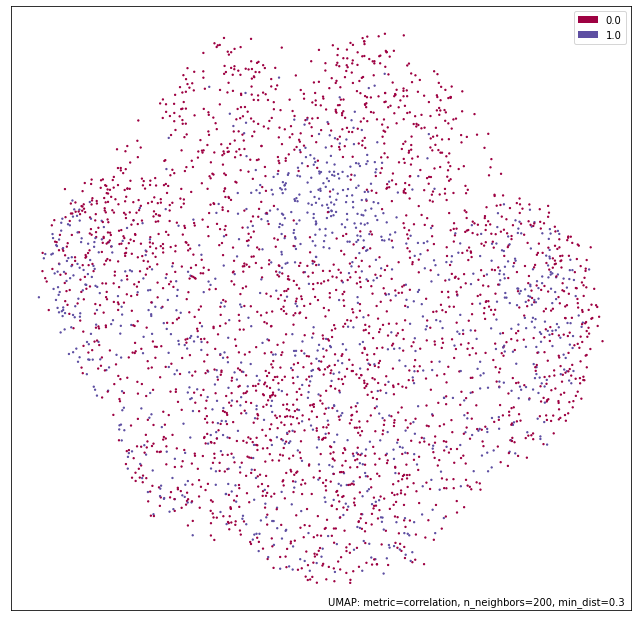

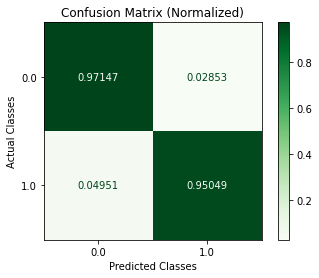

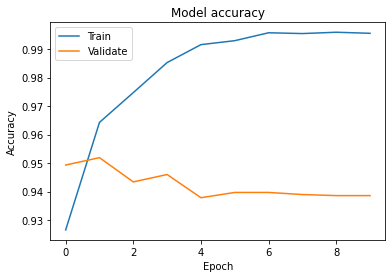

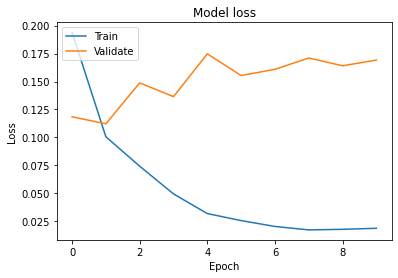

F1-Score: 94.3159922928709
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_32 (TimeDistr  (None, 10, 150, 32)  128        ['input_17[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_33 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_32[0][0]']    
 ibuted)                                                         

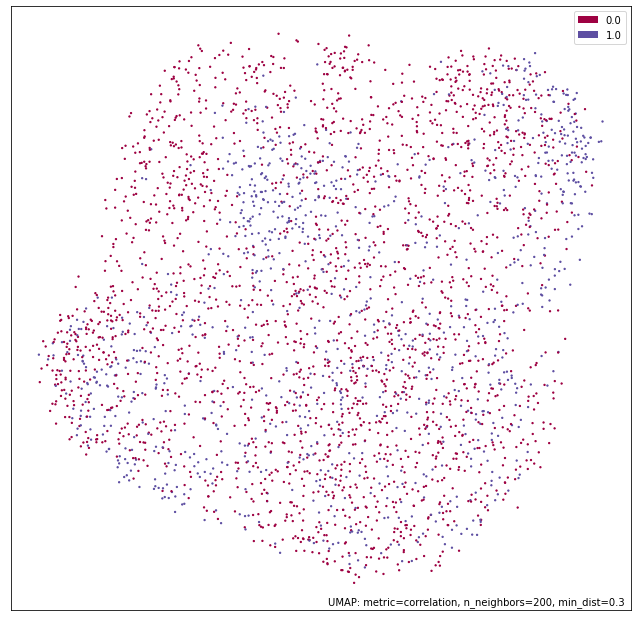

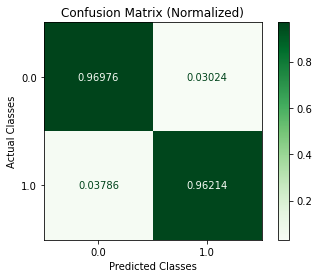

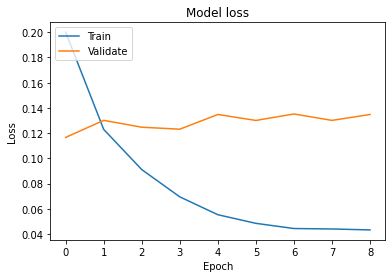

F1-Score: 94.74187380497132
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_36 (TimeDistr  (None, 10, 150, 32)  128        ['input_19[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_37 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_36[0][0]']    
 ibuted)                                                        

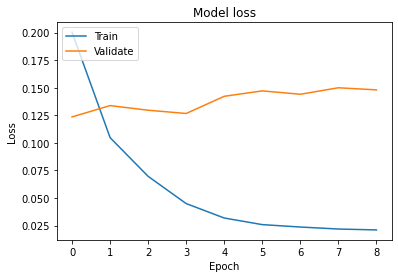

F1-Score: 94.76213358962038
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_40 (TimeDistr  (None, 10, 150, 32)  128        ['input_21[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_41 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_40[0][0]']    
 ibuted)                                                       

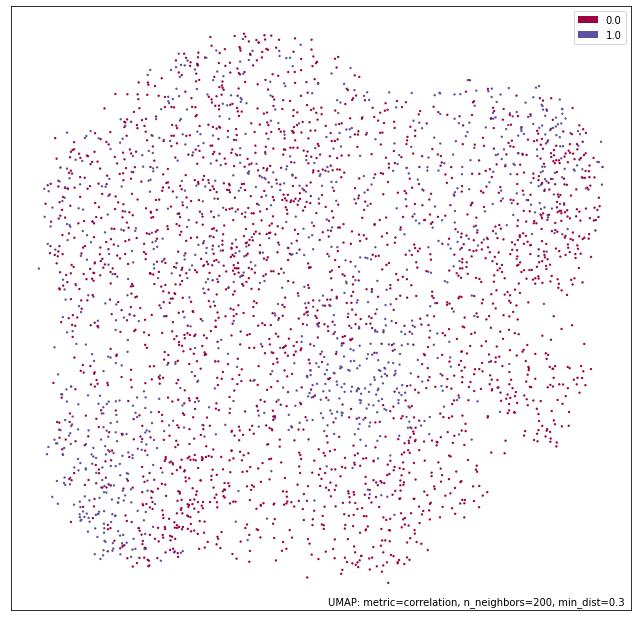

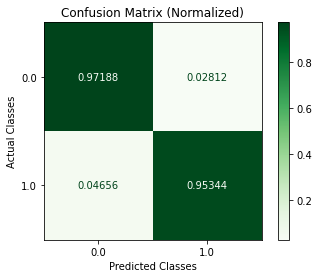

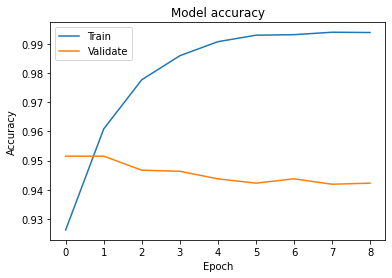

F1-Score: 94.51923076923077
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_44 (TimeDistr  (None, 10, 150, 32)  128        ['input_23[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_45 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_44[0][0]']    
 ibuted)                                                       

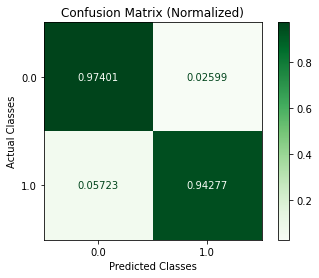

F1-Score: 94.18604651162791
MODEL-------------
{'Accuracy': '0.966+-0.0', 'Sensitivity': '0.953+-0.01', 'Specificity': '0.972+-0.0', 'F1-Score': '0.945+-0.0', 'MCC': '0.921+-0.0', 'AUC': [], 'PPV': '0.937+-0.0', 'NPV': '0.979+-0.0'}


In [ ]:
kfold_dnn_dp(X_signals_downsampled, hrv_data, y, summary=True, plotme=True, strat=5, binary=True, full=False)

# Knowledge Distillation (ECG)

In [ ]:

class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(teacher_predictions/self.temperature,student_predictions/self.temperature)
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
callbacks = [
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
    #        patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_knowledge_ecg(x, x2, y, summary=False, plotme=False, strat=2, binary=False):

 

  teacher_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  distilled_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  student_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()

  x = x.reshape(x.shape[0], int(x.shape[1]/150), 150)
  # x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

    
      # Create the teacher -------------------------------------------------------------------------------------
  

      # Create the student
      student = mm_cnn_lstn_simple_ecg(x, x2)

      teacher =mm_cnn_bilstm_attn(x, x2)
      # Create the teacher -------------------------------------------------------------------------------------
      teacher.compile(
          optimizer='adam',
          loss="binary_crossentropy",
          # loss=keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=["accuracy"])   


      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        x2_train = x2.iloc[train]
        x2_test = x2.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        x2_train = x2[train]
        x2_test = x2[test]
        y_train = y[train]
        y_test = y[test]
     


      x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x_train, x2_train, y_train, test_size=0.20, shuffle=False, random_state=69)

      sde = StandardScaler()
      x1_original = sde.fit_transform(x1_original.reshape(x1_original.shape[0], -1)).reshape(x1_original.shape)

      x1_holdout = sde.transform(x1_holdout.reshape(x1_holdout.shape[0], -1)).reshape(x1_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      sde = StandardScaler()

      x2_original = sde.fit_transform(x2_original)

      x2_holdout = sde.transform(x2_holdout)

      x2_test = sde.transform(x2_test)


     #-------------------------------------------------------------------------TEACHER------------------------------------------------------------------#
      history = teacher.fit([x1_original, x2_original], y_original, epochs=20, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = teacher.predict([x_test, x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

      teacher_metrics['Accuracy'].append(cm1.class_stat['ACC'][1])
      teacher_metrics['Sensitivity'].append(cm1.class_stat['TPR'][1])
      teacher_metrics['Specificity'].append(cm1.class_stat['TNR'][1])
      teacher_metrics['F1-Score'].append(cm1.class_stat['F1'][1])
      teacher_metrics['MCC'].append(cm1.class_stat['MCC'][1])
      teacher_metrics['PPV'].append(cm1.class_stat['PPV'][1])
      teacher_metrics['NPV'].append(cm1.class_stat['NPV'][1])
      #-----------------------------------------------------------------------------------------------------------------------------------------------------#
      
     #-------------------------------------------------------------------------DISTILLATION------------------------------------------------------------------#

      distiller = Distiller(student=student, teacher=teacher)
      distiller.compile(
            optimizer="adam",
            metrics=["accuracy"],
            student_loss_fn=keras.losses.BinaryCrossentropy(from_logits=False),
            distillation_loss_fn=keras.losses.BinaryCrossentropy(from_logits=False),          
            alpha=0.1,temperature=5)
      history = distiller.fit([x1_original, x2_original], y_original, epochs=10, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = student.predict([x_test, x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
          
      distilled_metrics['Accuracy'].append(cm1.class_stat['ACC'][1])
      distilled_metrics['Sensitivity'].append(cm1.class_stat['TPR'][1])
      distilled_metrics['Specificity'].append(cm1.class_stat['TNR'][1])
      distilled_metrics['F1-Score'].append(cm1.class_stat['F1'][1])
      distilled_metrics['MCC'].append(cm1.class_stat['MCC'][1])
      distilled_metrics['PPV'].append(cm1.class_stat['PPV'][1])
      distilled_metrics['NPV'].append(cm1.class_stat['NPV'][1])

      model_name = 'knowledge_distill_ecg_{}'.format(float(cm1.class_stat['F1'][1]*100))
      #saving
      atten_model_json = student.to_json()
      with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
          json_file.write(atten_model_json)
      # serialize weights to HDF5
      student.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))
      # model.save('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
      #-----------------------------------------------------------------------------------------------------------------------------------------------------#
    #-------------------------------------------------------------------------STUDENT------------------------------------------------------------------#
     
      # Clone student for later comparison
      student_scratch =  mm_cnn_lstn_simple_ecg_duplicate(x, x2)

      student_scratch.compile(
      optimizer="adam",
      loss=keras.losses.BinaryCrossentropy(from_logits=False),
      metrics=["accuracy"],)

      history = student_scratch.fit([x1_original, x2_original], y_original, epochs=10, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = student_scratch.predict([x_test, x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

      student_metrics['Accuracy'].append(cm1.class_stat['ACC'][1])
      student_metrics['Sensitivity'].append(cm1.class_stat['TPR'][1])
      student_metrics['Specificity'].append(cm1.class_stat['TNR'][1])
      student_metrics['F1-Score'].append(cm1.class_stat['F1'][1])
      student_metrics['MCC'].append(cm1.class_stat['MCC'][1])
      student_metrics['PPV'].append(cm1.class_stat['PPV'][1])
      student_metrics['NPV'].append(cm1.class_stat['NPV'][1])
      
 
       
     #-----------------------------------------------------------------------------------------------------------------------------------------------------#
  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in teacher_metrics['Accuracy']])
            sigma = np.std([x for x in teacher_metrics['Accuracy']])
            teacher_metrics['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in teacher_metrics['Sensitivity']])
            sigma = np.std([x for x in teacher_metrics['Sensitivity']])
            teacher_metrics['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in teacher_metrics['Specificity']])
            sigma = np.std([x for x in teacher_metrics['Specificity']])
            teacher_metrics['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in teacher_metrics['F1-Score']])
            sigma = np.std([x for x in teacher_metrics['F1-Score']])
            teacher_metrics['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in teacher_metrics['MCC']])
            sigma = np.std([x for x in teacher_metrics['MCC']])
            teacher_metrics['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in teacher_metrics['PPV']])
            sigma = np.std([x for x in teacher_metrics['PPV']])
            teacher_metrics['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in teacher_metrics['NPV']])
            sigma = np.std([x for x in teacher_metrics['NPV']])
            teacher_metrics['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass
        try:
            mu = np.mean([x for x in distilled_metrics['Accuracy']])
            sigma = np.std([x for x in distilled_metrics['Accuracy']])
            distilled_metrics['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in distilled_metrics['Sensitivity']])
            sigma = np.std([x for x in distilled_metrics['Sensitivity']])
            distilled_metrics['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in distilled_metrics['Specificity']])
            sigma = np.std([x for x in distilled_metrics['Specificity']])
            distilled_metrics['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in distilled_metrics['F1-Score']])
            sigma = np.std([x for x in distilled_metrics['F1-Score']])
            distilled_metrics['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in distilled_metrics['MCC']])
            sigma = np.std([x for x in distilled_metrics['MCC']])
            distilled_metrics['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in distilled_metrics['PPV']])
            sigma = np.std([x for x in distilled_metrics['PPV']])
            distilled_metrics['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in distilled_metrics['NPV']])
            sigma = np.std([x for x in distilled_metrics['NPV']])
            distilled_metrics['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass
        try:
            mu = np.mean([x for x in student_metrics['Accuracy']])
            sigma = np.std([x for x in student_metrics['Accuracy']])
            student_metrics['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in student_metrics['Sensitivity']])
            sigma = np.std([x for x in student_metrics['Sensitivity']])
            student_metrics['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in student_metrics['Specificity']])
            sigma = np.std([x for x in student_metrics['Specificity']])
            student_metrics['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in student_metrics['F1-Score']])
            sigma = np.std([x for x in student_metrics['F1-Score']])
            student_metrics['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in student_metrics['MCC']])
            sigma = np.std([x for x in student_metrics['MCC']])
            student_metrics['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in student_metrics['PPV']])
            sigma = np.std([x for x in student_metrics['PPV']])
            student_metrics['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in student_metrics['NPV']])
            sigma = np.std([x for x in student_metrics['NPV']])
            student_metrics['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("TEACHER METRICS-------------")
  print(teacher_metrics)   

  print("DISTILLED METRICS-------------")
  print(distilled_metrics)   

  print("STUDENT METRICS-------------")
  print(student_metrics)   



Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_88 (TimeDistr  (None, 10, 150, 4)  16          ['input_45[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_89 (TimeDistr  (None, 10, 150, 4)  16          ['time_distributed_88[0][0]']    
 ibuted)                                                                                   

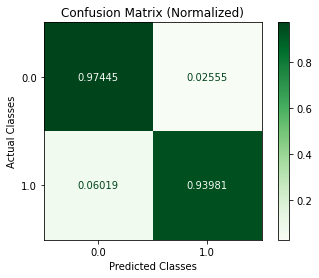

Epoch 1/10
676/676 [==============================] - 11s 10ms/step - accuracy: 0.8452 - student_loss: 0.3316 - distillation_loss: 0.1994 - val_accuracy: 0.9208 - val_student_loss: 0.0230
Epoch 2/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9219 - student_loss: 0.2033 - distillation_loss: 0.1850 - val_accuracy: 0.9345 - val_student_loss: 0.0147
Epoch 3/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9360 - student_loss: 0.1711 - distillation_loss: 0.1815 - val_accuracy: 0.9534 - val_student_loss: 0.0120
Epoch 4/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9432 - student_loss: 0.1506 - distillation_loss: 0.1793 - val_accuracy: 0.9567 - val_student_loss: 0.0098
Epoch 5/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9480 - student_loss: 0.1367 - distillation_loss: 0.1778 - val_accuracy: 0.9549 - val_student_loss: 0.0102
Epoch 6/10
676/676 [==============================] - 6s 9ms/step - 

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_96 (TimeDistr  (None, 10, 150, 4)  16          ['input_49[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_97 (TimeDistr  (None, 10, 150, 4)  16          ['time_distributed_96[0][0]']    
 ibuted)                                                                                   

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_51 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_100 (TimeDist  (None, 10, 150, 4)  16          ['input_51[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_101 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_100[0][0]']   
 ributed)                                                                                  

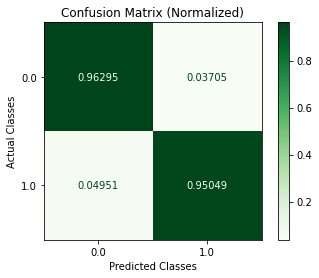

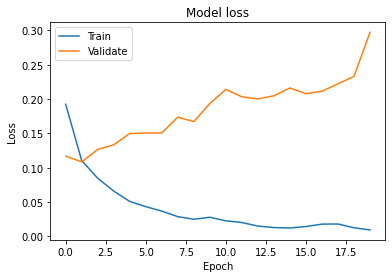

Epoch 1/10
676/676 [==============================] - 11s 10ms/step - accuracy: 0.9166 - student_loss: 0.2736 - distillation_loss: 0.1964 - val_accuracy: 0.9427 - val_student_loss: 0.0393
Epoch 2/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9400 - student_loss: 0.1689 - distillation_loss: 0.1823 - val_accuracy: 0.9556 - val_student_loss: 0.0311
Epoch 3/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9469 - student_loss: 0.1441 - distillation_loss: 0.1794 - val_accuracy: 0.9526 - val_student_loss: 0.0284
Epoch 4/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9511 - student_loss: 0.1322 - distillation_loss: 0.1777 - val_accuracy: 0.9452 - val_student_loss: 0.0158
Epoch 5/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9537 - student_loss: 0.1226 - distillation_loss: 0.1766 - val_accuracy: 0.9460 - val_student_loss: 0.0179
Epoch 6/10
676/676 [==============================] - 6s 9ms/step - 

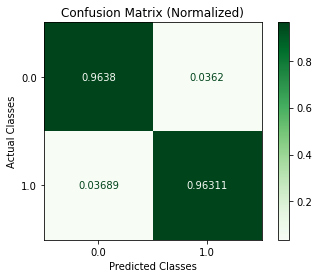

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_55 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_108 (TimeDist  (None, 10, 150, 4)  16          ['input_55[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_109 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_108[0][0]']   
 ributed)                                                                                  

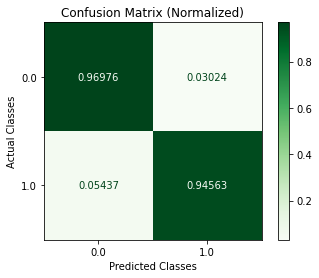

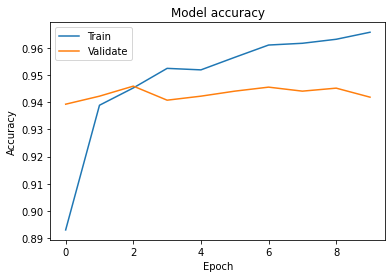

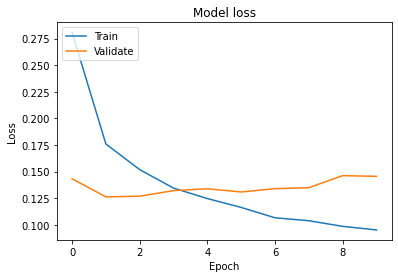

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_57 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_112 (TimeDist  (None, 10, 150, 4)  16          ['input_57[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_113 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_112[0][0]']   
 ributed)                                                                                  

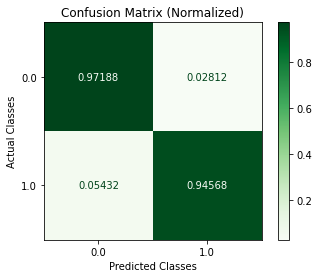

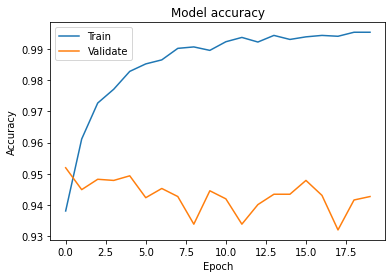

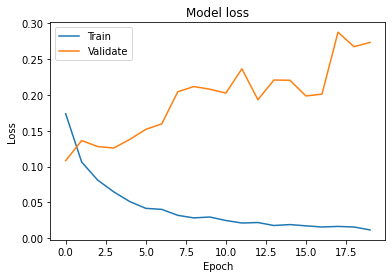

Epoch 1/10
676/676 [==============================] - 12s 10ms/step - accuracy: 0.8390 - student_loss: 0.3549 - distillation_loss: 0.2019 - val_accuracy: 0.9245 - val_student_loss: 0.0304
Epoch 2/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9196 - student_loss: 0.2148 - distillation_loss: 0.1851 - val_accuracy: 0.9478 - val_student_loss: 0.0496
Epoch 3/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9430 - student_loss: 0.1616 - distillation_loss: 0.1796 - val_accuracy: 0.9508 - val_student_loss: 0.0399
Epoch 4/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9491 - student_loss: 0.1373 - distillation_loss: 0.1776 - val_accuracy: 0.9560 - val_student_loss: 0.0372
Epoch 5/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9566 - student_loss: 0.1193 - distillation_loss: 0.1752 - val_accuracy: 0.9493 - val_student_loss: 0.0358
Epoch 6/10
676/676 [==============================] - 6s 9ms/step - 

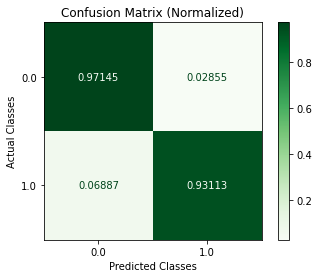

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_61 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_120 (TimeDist  (None, 10, 150, 4)  16          ['input_61[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_121 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_120[0][0]']   
 ributed)                                                                                  

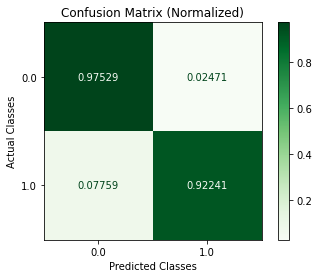

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_63 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_124 (TimeDist  (None, 10, 150, 4)  16          ['input_63[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_125 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_124[0][0]']   
 ributed)                                                                                  

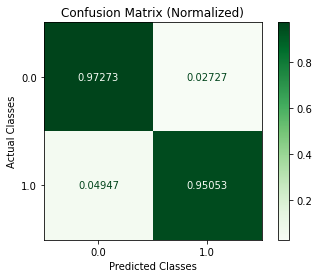

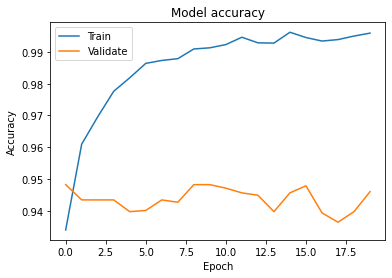

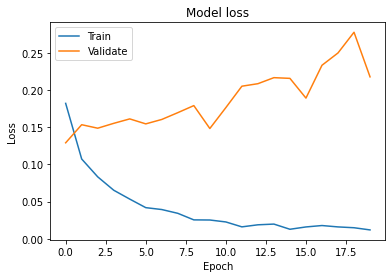

Epoch 1/10
676/676 [==============================] - 11s 10ms/step - accuracy: 0.9129 - student_loss: 0.2653 - distillation_loss: 0.1917 - val_accuracy: 0.9334 - val_student_loss: 0.0114
Epoch 2/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9402 - student_loss: 0.1642 - distillation_loss: 0.1807 - val_accuracy: 0.9504 - val_student_loss: 0.0066
Epoch 3/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9473 - student_loss: 0.1399 - distillation_loss: 0.1777 - val_accuracy: 0.9464 - val_student_loss: 0.0038
Epoch 4/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9518 - student_loss: 0.1265 - distillation_loss: 0.1765 - val_accuracy: 0.9456 - val_student_loss: 0.0035
Epoch 5/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9563 - student_loss: 0.1157 - distillation_loss: 0.1750 - val_accuracy: 0.9441 - val_student_loss: 0.0029
Epoch 6/10
676/676 [==============================] - 6s 10ms/step -

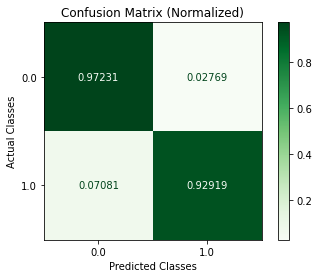

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_67 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_132 (TimeDist  (None, 10, 150, 4)  16          ['input_67[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_133 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_132[0][0]']   
 ributed)                                                                                  

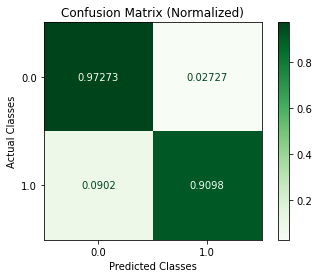

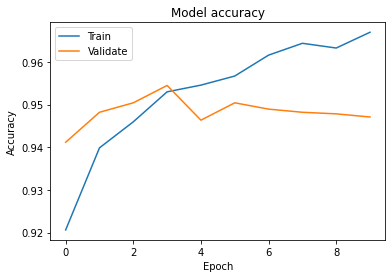

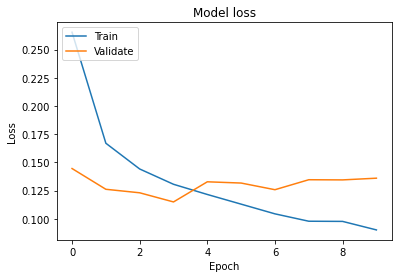

Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_69 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_136 (TimeDist  (None, 10, 150, 4)  16          ['input_69[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_137 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_136[0][0]']   
 ributed)                                                                                  

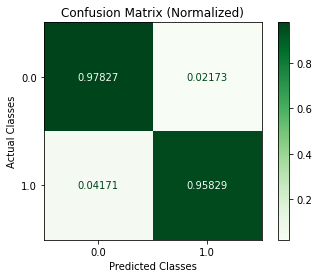

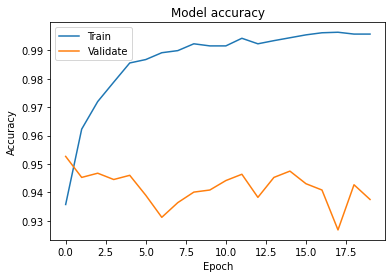

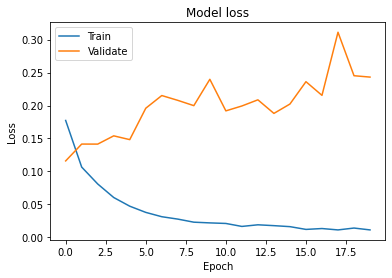

Epoch 1/10
676/676 [==============================] - 12s 10ms/step - accuracy: 0.8967 - student_loss: 0.3155 - distillation_loss: 0.2015 - val_accuracy: 0.9375 - val_student_loss: 0.0374
Epoch 2/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9295 - student_loss: 0.1804 - distillation_loss: 0.1840 - val_accuracy: 0.9515 - val_student_loss: 0.0243
Epoch 3/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9412 - student_loss: 0.1521 - distillation_loss: 0.1806 - val_accuracy: 0.9497 - val_student_loss: 0.0168
Epoch 4/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9430 - student_loss: 0.1400 - distillation_loss: 0.1792 - val_accuracy: 0.9519 - val_student_loss: 0.0106
Epoch 5/10
676/676 [==============================] - 6s 9ms/step - accuracy: 0.9482 - student_loss: 0.1324 - distillation_loss: 0.1777 - val_accuracy: 0.9526 - val_student_loss: 0.0074
Epoch 6/10
676/676 [==============================] - 6s 9ms/step - 

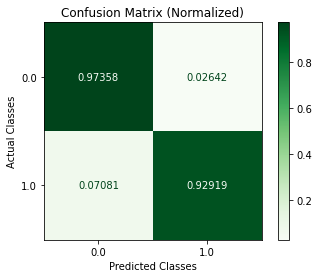

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_73 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_144 (TimeDist  (None, 10, 150, 4)  16          ['input_73[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_145 (TimeDist  (None, 10, 150, 4)  16          ['time_distributed_144[0][0]']   
 ributed)                                                                                  

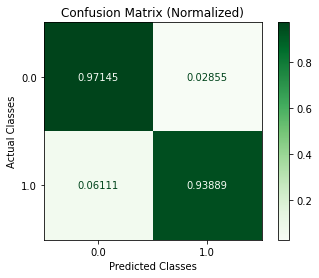

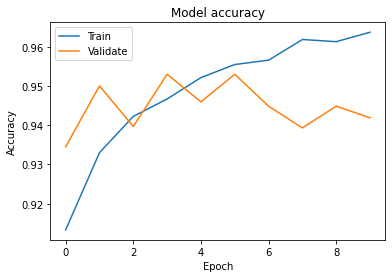

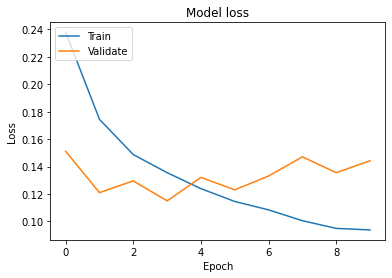

TEACHER METRICS-------------
{'Accuracy': '0.965+-0.0', 'Sensitivity': '0.949+-0.01', 'Specificity': '0.972+-0.01', 'F1-Score': '0.943+-0.01', 'MCC': '0.918+-0.01', 'AUC': [], 'PPV': '0.937+-0.01', 'NPV': '0.977+-0.0'}
DISTILLED METRICS-------------
{'Accuracy': '0.961+-0.0', 'Sensitivity': '0.94+-0.01', 'Specificity': '0.97+-0.0', 'F1-Score': '0.936+-0.0', 'MCC': '0.908+-0.0', 'AUC': [], 'PPV': '0.933+-0.01', 'NPV': '0.974+-0.01'}
STUDENT METRICS-------------
{'Accuracy': '0.959+-0.0', 'Sensitivity': '0.934+-0.02', 'Specificity': '0.969+-0.01', 'F1-Score': '0.932+-0.01', 'MCC': '0.903+-0.01', 'AUC': [], 'PPV': '0.931+-0.01', 'NPV': '0.971+-0.01'}


In [ ]:
kfold_knowledge_ecg(X_signals_downsampled, hrv_data, y, summary=True, plotme=True, strat=5, binary=True)

# Double Quantized ECG


In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#cnn_1d, lstm_vanilla, lstm_bidirection, cnn_lstm, cnn_bilstm_attn

 
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
           patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_dnn_dp_quant(x, x2, y, summary=False, plotme=False, strat=2, binary=False, full=False):
  sde = StandardScaler()
  
  x = x.reshape(x.shape[0], int(x.shape[1]/150), 150) #for LSTM
  if full == True:
    model_name = 'trained_cnnlstm_50hz_FULL'
    model = cnn_bilstm_attn(x)
    x_to_train = sde.fit_transform(x.reshape(x.shape[0], -1)).reshape(x.shape)
    model.fit(x, y, epochs=10, batch_size=16, callbacks = callbacks, verbose=1)
    #saving
    atten_model_json = model.to_json()
    with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
        json_file.write(atten_model_json)
    # serialize weights to HDF5
    model.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))


  metrics_one = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()

  # x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

      model = mm_cnn_bilstm_attn_quant(x, x2)

      
      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        x2_train = x2.iloc[train]
        x2_test = x2.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        x2_train = x2[train]
        x2_test = x2[test]
        y_train = y[train]
        y_test = y[test]
     
 
      x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x_train, x2_train, y_train, test_size=0.2, shuffle=False, random_state=69)

      print(x1_original.shape)

      x1_original = sde.fit_transform(x1_original.reshape(x1_original.shape[0], -1)).reshape(x1_original.shape)

      x1_holdout = sde.transform(x1_holdout.reshape(x1_holdout.shape[0], -1)).reshape(x1_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      sde = StandardScaler()

      x2_original = sde.fit_transform(x2_original)

      x2_holdout = sde.transform(x2_holdout)

      x2_test = sde.transform(x2_test)


      history = model.fit([x1_original,x2_original], y_original, epochs=10, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), callbacks = callbacks, verbose=1)
      epoch_elapsed = time.time()-epoch_start
      
      converter = tf.lite.TFLiteConverter.from_keras_model(model)
      converter.optimizations = [tf.lite.Optimize.DEFAULT]
      quantized_tflite_model = converter.convert()
      interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
      interpreter.allocate_tensors()

      y_pred = interpreter.predict([x_test,x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            # print(cm)
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            
      _, quant_file = tempfile.mkstemp('.tflite')

      with open(quant_file, 'wb') as f:
        f.write(quantized_tflite_model)
      metrics_one['Accuracy'].append(cm1.class_stat['ACC'][1])
      metrics_one['Sensitivity'].append(cm1.class_stat['TPR'][1])
      metrics_one['Specificity'].append(cm1.class_stat['TNR'][1])
      metrics_one['F1-Score'].append(cm1.class_stat['F1'][1])
      metrics_one['MCC'].append(cm1.class_stat['MCC'][1])
      metrics_one['PPV'].append(cm1.class_stat['PPV'][1])
      metrics_one['NPV'].append(cm1.class_stat['NPV'][1])
      print('F1-Score:', float(cm1.class_stat['F1'][1]*100))




      model_name = 'new_cnn_hrv_quant_{}'.format(float(cm1.class_stat['F1'][1]*100))
      #saving
      atten_model_json = model.to_json()
      with open("/content/drive/MyDrive/P13-ExplainHeart/{}.json".format(model_name), "w") as json_file:
          json_file.write(atten_model_json)
      # serialize weights to HDF5
      model.save_weights("/content/drive/MyDrive/P13-ExplainHeart/{}.h5".format(model_name))
      # model.save('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
       


  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in metrics_one['Accuracy']])
            sigma = np.std([x for x in metrics_one['Accuracy']])
            metrics_one['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in metrics_one['Sensitivity']])
            sigma = np.std([x for x in metrics_one['Sensitivity']])
            metrics_one['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in metrics_one['Specificity']])
            sigma = np.std([x for x in metrics_one['Specificity']])
            metrics_one['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in metrics_one['F1-Score']])
            sigma = np.std([x for x in metrics_one['F1-Score']])
            metrics_one['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in metrics_one['MCC']])
            sigma = np.std([x for x in metrics_one['MCC']])
            metrics_one['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in metrics_one['PPV']])
            sigma = np.std([x for x in metrics_one['PPV']])
            metrics_one['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in metrics_one['NPV']])
            sigma = np.std([x for x in metrics_one['NPV']])
            metrics_one['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("MODEL-------------")
  print(metrics_one)   



In [ ]:
kfold_dnn_dp_quant(X_signals_downsampled, hrv_data, y, summary=True, plotme=True, strat=5, binary=True, full=False)

TypeError: ignored

## Saved and Loaded Model

In [ ]:
model_name =  'trained_cnnlstm_50hz_96.83895771038019'
# new_model = load_model('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
json_file = open('/content/drive/MyDrive/P13-ExplainHeart/{}.json'.format(model_name), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json, custom_objects={'Attention':Attention(return_sequences=False), 'TimeDistributed': TimeDistributed, 'Bidirectional': Bidirectional})
# load weights into new model
loaded_model.load_weights('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
print("Loaded model from disk")
print(loaded_model.summary())

# Checking NN sizes (ECG)

In [ ]:
x = hrv_data
x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
model = cnn_1d(x)
model.fit(x, y, epochs=1)
print(model.summary())

# x = x.reshape(x.shape[0], int(x.shape[1]/150), 150) #for LSTM

# model = lstm_vanilla(x)
# model.fit(x, y, epochs=1)
# print(model.summary())

# model = lstm_bidirection(x)
# model.fit(x, y, epochs=1)
# print(model.summary())


# model = cnn_lstm(x)
# model.fit(x, y, epochs=1)
# print(model.summary())

# model = cnn_bilstm_attn(x)
# model.fit(x, y, epochs=1)
# print(model.summary())


262/262 [==============================] - 3s 5ms/step - loss: 0.2358 - accuracy: 0.9072
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 26, 32)            128       
                                                                 
 batch_normalization_51 (Bat  (None, 26, 32)           128       
 chNormalization)                                                
                                                                 
 conv1d_52 (Conv1D)          (None, 26, 64)            6208      
                                                                 
 batch_normalization_52 (Bat  (None, 26, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_61 (Dropout)        (None, 26, 64)            0         
                              

# PPG

In [ ]:
X_ppg = np.load("/content/drive/MyDrive/P13-ExplainHeart/umass_signals_original_hrv.npy", allow_pickle=True)
Y_ppg = np.load("/content/drive/MyDrive/P13-ExplainHeart/umass_signals_labels_hrv.npy", allow_pickle=True)

## PRV features optional


In [ ]:
prv = pd.read_csv("/content/drive/MyDrive/P13-ExplainHeart/hrv_umass_version1.csv")
prv.replace([np.inf, -np.inf], np.nan, inplace=True)
independent = prv.copy().astype('float64')
# mask = hrv.loc[hrv.Class == 'x'].index.tolist()
# print(len(mask))
# print(mask)
# hrv.drop(index=mask, inplace=True)
print(prv.shape)

(246, 26)


In [ ]:
concat = np.concatenate((prv[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]],Y_ppg.reshape(Y_ppg.shape[0], 1)), axis=1)
hrv_excel = pd.DataFrame(concat, columns=["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD", "Class"])
hrv_excel[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD", "Class"]].describe().to_csv("/content/drive/MyDrive/P13-ExplainHeart/metadata_PPG_full.csv")


In [ ]:
prv[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD", "Class"]].groupby('Class').describe().to_csv("/content/drive/MyDrive/P13-ExplainHeart/metadata_ECG.csv")

mcvNN       0.255112
SHAN        0.204293
madNN       0.190983
cvi_m       0.185485
cvsd        0.178519
medianNN    0.149776
cvnn        0.141286
pnn50       0.141223
cvi         0.134602
CD          0.124950
sdnn        0.114985
apen        0.104261
pnn20       0.103076
LZC         0.102667
rmssd       0.090065
sampen      0.087643
DFA         0.087252
FUZZY       0.087081
meanRR      0.086778
KFD         0.073717
SDSD        0.071450
HFD         0.064682
csi         0.050785
MSE         0.047688
TINN        0.032583
CMSE        0.000000
dtype: float64


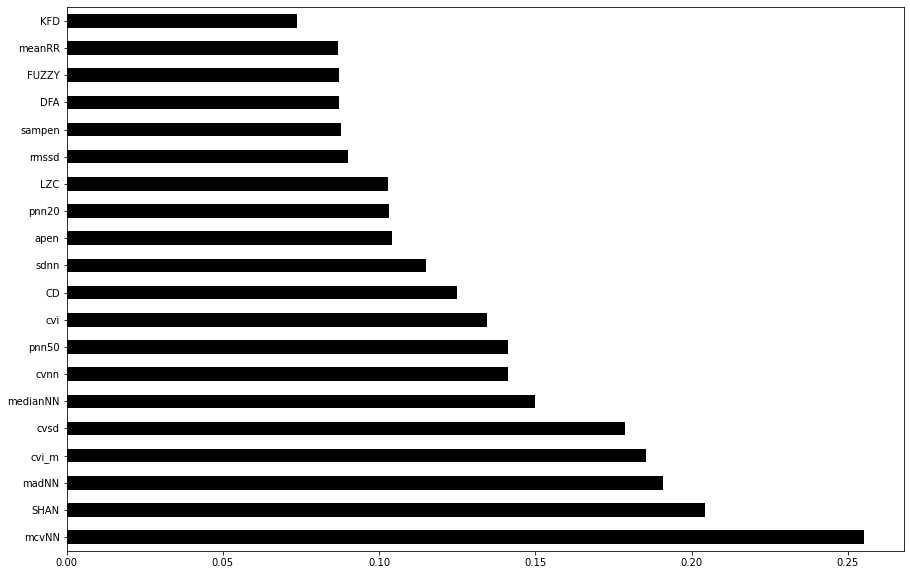

In [ ]:
#Mutual Information Gain

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile


independent.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
mutual_info = mutual_info_classif(independent, Y_ppg)
mutual_info = pd.Series(mutual_info)
corr_mi = mutual_info.index
mutual_info.index = independent.columns
mutual_info = mutual_info.sort_values(ascending=False)
print(mutual_info)
plt.figure(figsize=(15,10))
mutual_info.nlargest(20).sort_values(ascending=False).plot.barh(color='#000000')
plt.show()

In [ ]:
prv

rmssd      meanRR        sdnn      cvnn      cvsd  medianNN   madNN  \
0    187.949461  861.212121  136.284573  0.158247  0.218238     880.0  88.956   
1    170.567680  914.193548  106.732507  0.116750  0.186577     900.0  59.304   
2    177.125191  928.387097   99.702784  0.107394  0.190788     920.0  59.304   
3    214.453361  690.952381  141.159130  0.204296  0.310374     680.0  44.478   
4     29.591818  761.052632   31.519147  0.041415  0.038883     760.0  29.652   
..          ...         ...         ...       ...       ...       ...     ...   
241  112.910221  711.000000   67.626425  0.095115  0.158805     700.0  29.652   
242  159.391701  795.000000   90.758707  0.114162  0.200493     790.0  74.130   
243  139.263368  798.888889   83.350474  0.104333  0.174321     800.0  59.304   
244  147.044967  774.054054  111.839654  0.144486  0.189967     800.0  59.304   
245  129.747007  793.888889   81.250153  0.102344  0.163432     800.0  59.304   

        mcvNN      pnn50      pnn20  ...      TINN      SHAN     FUZZY  \
0    0.101086  69.696970  72.727273  ...  359.3750  3.870004  1.430898   
1    0.065893  70.967742  83.870968  ...  164.0625  3.627764  1.798066   
2    0.064461  58.064516  74.193548  ...  179.6875  3.372921  1.275611   
3    0.065409  66.666667  80.952381  ...  242.1875  3.483866  1.225558   
4    0.039016   7.894737  34.210526  ...   93.7500  2.604312  1.252325   
..        ...        ...        ...  ...       ...       ...       ...   
241  0.042360  37.500000  55.000000  ...  242.1875  3.013968  0.951165   
242  0.093835  61.111111  75.000000  ...  179.6875  3.752715  1.695595   
243  0.074130  63.888889  80.555556  ...  156.2500  3.517593  1.793907   
244  0.074130  45.945946  59.459459  ...  484.3750  3.472571  1.187045   
245  0.074130  50.000000  69.444444  ...  234.3750  3.328795  1.166983   

          MSE      CMSE        CD       HFD       KFD       LZC       DFA  
0    0.000000  0.000000  1.879204  2.020911  3.245555  1.528604  0.443698  
1    0.000000  0.000000  2.000074  2.116751  4.210392  1.438315  0.261662  
2    0.000000  0.000000  1.495169  2.055105  8.492854  1.438315  0.211543  
3    0.701422  0.747003  1.148457  2.119459  2.354875  1.283885  0.504670  
4    0.000000  0.853062  1.235719  1.786244  2.199798  1.104827  0.874858  
..        ...       ...       ...       ...       ...       ...       ...  
241  0.429532  0.000000  1.373923  2.084962  3.292506  1.197434  0.118592  
242       NaN       NaN  1.876742  2.077090  3.982422  1.579699  0.161405  
243       NaN       NaN  1.888054  2.051935  3.950643  1.436090  0.333991  
244  0.525015  0.486478  1.383176  1.915022  2.144367  1.126368  0.851049  
245  0.535789  0.000000  1.311315  2.090695  1.896741  1.579699  0.210190  

[246 rows x 26 columns]

In [ ]:
prv.isnull().sum() / prv.shape[0] * 100.00

rmssd        0.000000
meanRR       0.000000
sdnn         0.000000
cvnn         0.000000
cvsd         0.000000
medianNN     0.000000
madNN        0.000000
mcvNN        0.000000
pnn50        0.000000
pnn20        0.000000
csi          0.000000
sampen      26.829268
apen         0.000000
cvi          0.000000
cvi_m        0.000000
SDSD         0.000000
TINN         0.000000
SHAN         0.000000
FUZZY        0.000000
MSE         23.983740
CMSE        27.235772
CD           0.000000
HFD          0.000000
KFD          0.000000
LZC          0.000000
DFA          0.000000
dtype: float64

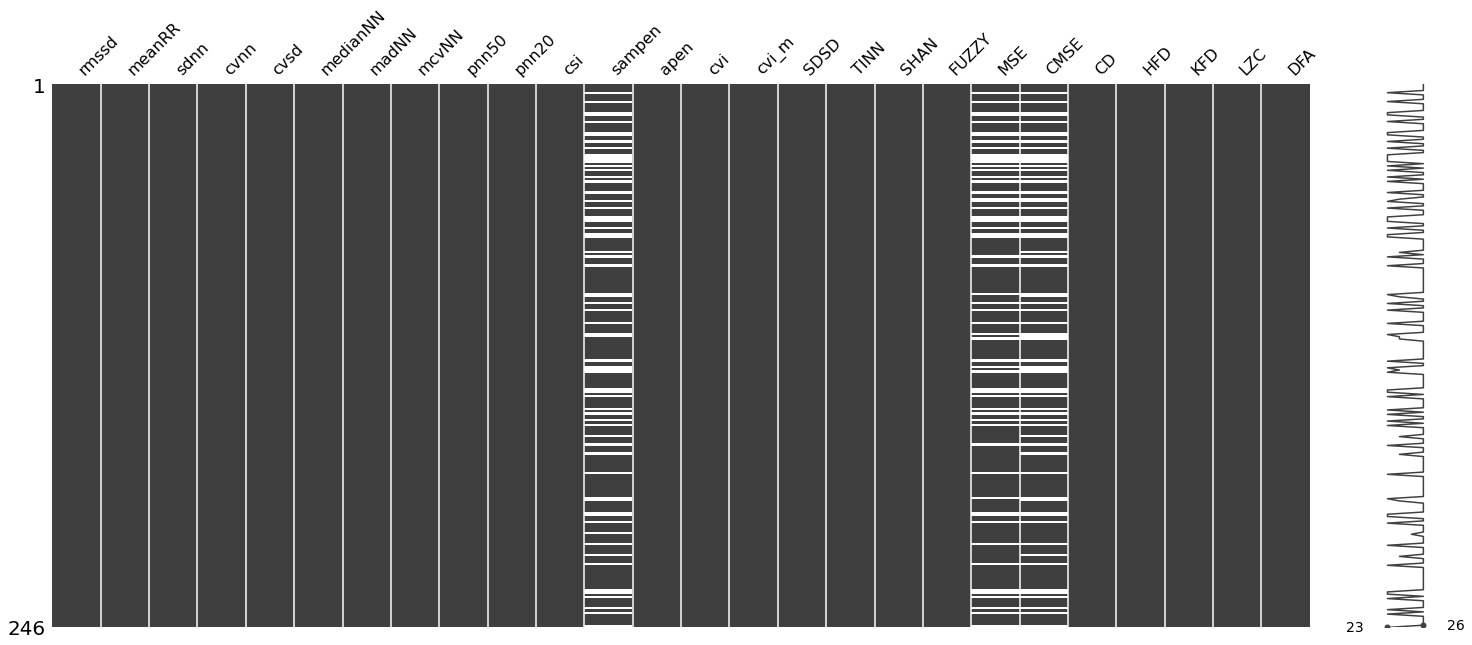

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(prv.sample(len(prv)))

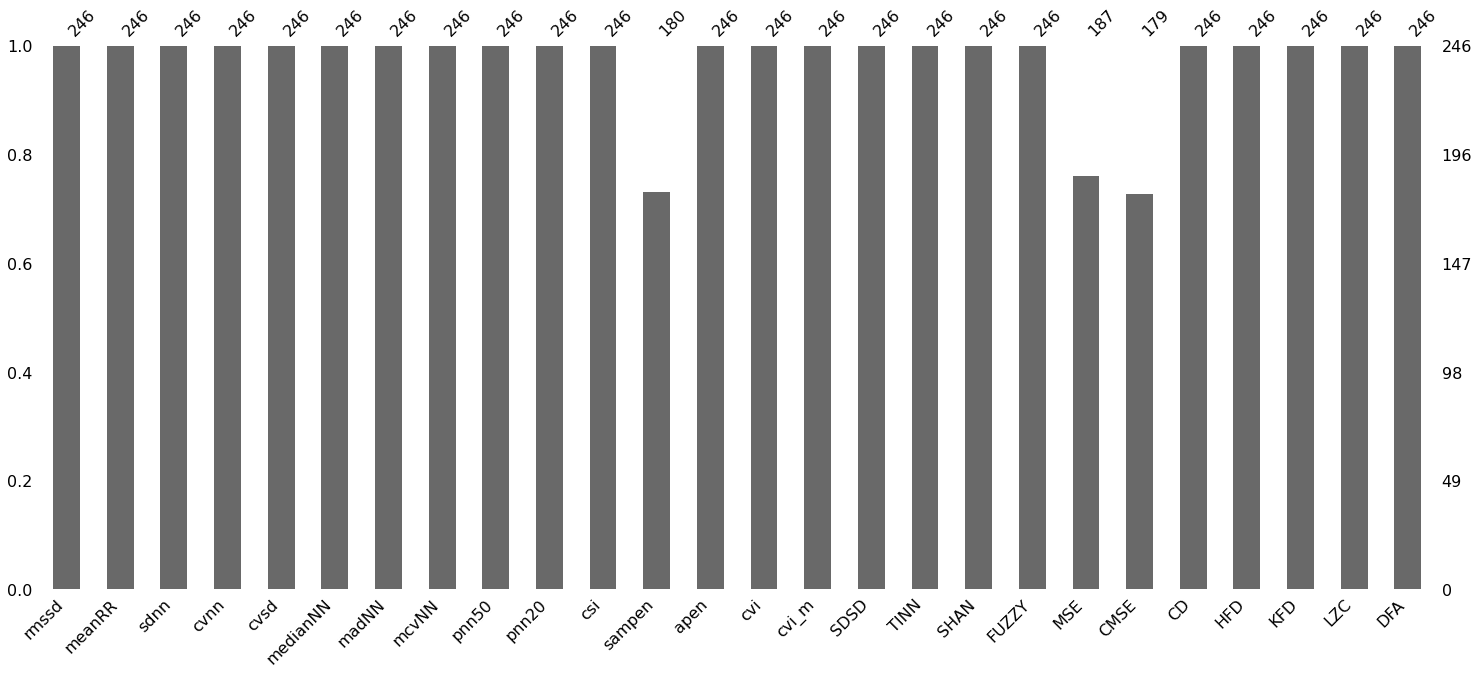

In [ ]:
msno.bar(prv.sample(len(prv)))

In [ ]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from missingpy import MissForest
imputer = MissForest()
prv_imputed = imputer.fit_transform(prv)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 2


In [ ]:
prv_imputed.shape

(246, 26)

In [ ]:
from collections import Counter
counter = Counter(Y_ppg)
print("Train Labels"  +  str(counter))

Train LabelsCounter({0: 192, 1: 54})


In [ ]:
plotme(X_ppg[0])

In [ ]:
# [CNNLSTM WITH COVARIATES: 95.14189514189513]

### Attention Layer

In [ ]:
from tensorflow.keras.layers import Layer, RepeatVector
from tensorflow.keras import backend as K

class Attention(Layer):
    
    def __init__(self, return_sequences=True, **kwargs):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'return_sequences': self.return_sequences 
      })
      return config


## 1D CNN-BIlstm with Attention

In [ ]:
def cnn_bilstm_attn(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2], 1)
  print('Inputshap[e', input_shape)

  model = Sequential()
  
  model.add(TimeDistributed(Conv1D(filters=8, kernel_size=(3), activation='relu', padding="same"), input_shape=input_shape))
  model.add(TimeDistributed(BatchNormalization(momentum=0.9)))
  model.add(TimeDistributed(Dropout(0.3)))
  model.add(TimeDistributed(Flatten()))
  model.add(Bidirectional(LSTM(8, return_sequences=True)))
  model.add(Attention(return_sequences=False))
  model.add(Dropout(0.2))
  model.add((Dense(8, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D CNN-Lstm with Attention

In [ ]:
def cnn_lstm(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2], 1)

  model = Sequential()
  
  model.add(TimeDistributed(Conv1D(filters=8, kernel_size=(3), activation='relu', padding="same"), input_shape=input_shape))
  model.add(TimeDistributed(BatchNormalization(momentum=0.9)))
  model.add(TimeDistributed(Dropout(0.3)))
  model.add(TimeDistributed(Flatten()))
  # model.add(Bidirectional(LSTM(32, return_sequences=True)))
  model.add((LSTM(8, return_sequences=False)))
  # model.add(Attention(return_sequences=False))
  model.add(Dropout(0.2))
  model.add((Dense(8, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D LSTM

In [ ]:
def lstm_vanilla(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2])

  model =  Sequential()
  model.add((LSTM(32, return_sequences=True, input_shape=input_shape)))
  model.add((LSTM(16, return_sequences=True)))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Dense(16, activation='relu')))
  model.add(TimeDistributed(Dense(8, activation='relu')))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add((Dense(8, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D BiLSTM 

In [ ]:
def lstm_bidirection(X_in, out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  print(X_in[0].shape)
  # X_in = X_in.T
  input_shape = (X_in.shape[1], X_in.shape[2])


  model =  Sequential()
  model.add(Bidirectional(LSTM(32, return_sequences=True, input_shape=input_shape)))
  model.add(Bidirectional(LSTM(16, return_sequences=True)))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Dense(16, activation='relu')))
  model.add(TimeDistributed(Dense(8, activation='relu')))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add((Dense(8, activation='relu')))
  model.add(Dense(out_classes, activation=final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  return model

## 1D CNN

In [ ]:
def cnn_1d(X_in,out_classes=1, final_activation='sigmoid', loss_function='binary_crossentropy', optimizer='adam'):

  input_shape = (X_in[0].shape[0], 1)
  

  model = Sequential()
  

  model.add(keras.layers.Conv1D(8, 3, padding='same', input_shape=input_shape, activation='relu', dilation_rate=4))
  model.add(BatchNormalization(momentum=0.9))

  model.add(keras.layers.Conv1D(16, 3, padding='same', input_shape=input_shape, activation='relu', dilation_rate=2))
  model.add(BatchNormalization(momentum=0.9))

  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.MaxPooling1D(pool_size=2))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(8, activation = 'relu'))
  model.add(keras.layers.Dense(out_classes, activation = final_activation))

  model.compile(loss=loss_function, 
              optimizer=optimizer,
              metrics =['accuracy'])
  
  # model.summary()
  return model

# Multi-Modal Models

In [ ]:
def mm_cnn_bilstm_attn_ppg(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed(Conv1D(filters=8, kernel_size=(3), activation='relu', padding="same"))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.9))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(8, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
#  x = tf.keras.layers.MultiHeadAttention(num_heads=5, key_dim=2)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = Dense(8, activation='relu')(x)
 x = Dense(1, activation='sigmoid')(x)

 model = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(model.summary())
 return model

In [ ]:
def mm_cnn_lstn_simple_ppg(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed(Conv1D(filters=8, kernel_size=(3), activation='relu', padding="same"))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.4))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(4, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = Dense(8, activation='relu')(x)
 x = Dense(1, activation='sigmoid')(x)

 model = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(model.summary())
 return model

In [ ]:
def mm_cnn_lstn_simple_ppg_duplicate(X_in, X2_in):
 input_layer1 = Input(shape=(X_in.shape[1], X_in.shape[2], 1))
 x = TimeDistributed(Conv1D(filters=8, kernel_size=(3), activation='relu', padding="same"))(input_layer1)
 x = TimeDistributed(BatchNormalization(momentum=0.4))(x)
 x = TimeDistributed(Dropout(0.3))(x)
 x = TimeDistributed(Flatten())(x)
 x = Bidirectional(LSTM(4, return_sequences=True))(x)
 x = Attention(return_sequences=False)(x)
 x = Dropout(0.2)(x)
 input_layer2 = Input(shape=(X2_in.shape[1]))
 x = concatenate([x, input_layer2])
 x = Dense(8, activation='relu')(x)
 x = Dense(1, activation='sigmoid')(x)

 dmodel = Model(inputs=[input_layer1, input_layer2], outputs =[x])
 dmodel.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

 print(dmodel.summary())
 return dmodel

# Data Homogenization

In [ ]:
X_signals_binary = []
y_ppg = []

for x, lab in zip(X_ppg, Y_ppg):
    if lab == 0 or lab  == 1:
          X_signals_binary.append(x)
          y_ppg.append(lab)

X_signals_binary = np.asarray(X_signals_binary).astype(float)
y_ppg = np.asarray(y_ppg).astype(float)
print(X_signals_binary.shape)
print(y_ppg.shape)
prv_data = prv[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]].to_numpy()
counter = Counter(y_ppg)
print("Train Labels"  +  str(counter))
print(prv_data.shape)

(246, 1500)
(246,)
Train LabelsCounter({0.0: 192, 1.0: 54})
(246, 6)


## Transfer Learning (Fine-Tuning)

## Saved and loaded model

In [ ]:
model_name =  'trained_cnnlstm_50hz_97.54816112084063'
json_file = open('/content/drive/MyDrive/P13-ExplainHeart/{}.json'.format(model_name), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
for layer in loaded_model.layers[:-1]:
  print(layer)
  layer.trainable = False

# custom_objects={'Attention':Attention(return_sequences=False), 'TimeDistributed': TimeDistributed, 'Bidirectional': Bidirectional}

## Transfer Learning (PPG)

In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
           patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_dnn(x, y, summary=False, plotme=False, strat=2, binary=False):

  metrics_one = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()
  x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  # x = x.reshape(x.shape[0], int(x.shape[1]/150), 150)
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

      model = cnn_1d(x)
      # model_name =  'trained_cnnlstm_50hz_95.96965386439071'
      # json_file = open('/content/drive/MyDrive/P13-ExplainHeart/{}.json'.format(model_name), 'r')
      # loaded_model_json = json_file.read()
      # json_file.close()
      # loaded_model = keras.models.model_from_json(loaded_model_json)
      # loaded_model.load_weights('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
      # for layer in loaded_model.layers[:-4]:
      #   print(layer)
      #   layer.trainable = False
      # model = loaded_model
      # model.compile(loss='binary_crossentropy', 
      #         optimizer='adam',
      #         metrics =['accuracy'])
      # for layer in model.layers:
      #   print(layer.trainable)
            
      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]
     
      x_original, x_holdout, y_original, y_holdout = train_test_split(x_train, y_train, test_size=0.20, shuffle=False, random_state=69)

      sde = StandardScaler()

      x_original = sde.fit_transform(x_original.reshape(x_original.shape[0], -1)).reshape(x_original.shape)

      x_holdout = sde.transform(x_holdout.reshape(x_holdout.shape[0], -1)).reshape(x_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      history = model.fit(x_original, y_original, epochs=10, batch_size=16, validation_data=(x_holdout, y_holdout), callbacks = callbacks, verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = model.predict(x_test)
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            # print(cm)
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()
            model.summary()

      metrics_one['Accuracy'].append(cm1.class_stat['ACC'][1])
      metrics_one['Sensitivity'].append(cm1.class_stat['TPR'][1])
      metrics_one['Specificity'].append(cm1.class_stat['TNR'][1])
      metrics_one['F1-Score'].append(cm1.class_stat['F1'][1])
      metrics_one['MCC'].append(cm1.class_stat['MCC'][1])
      metrics_one['PPV'].append(cm1.class_stat['PPV'][1])
      metrics_one['NPV'].append(cm1.class_stat['NPV'][1])
       
  print("Total Training and Inference Time -> {}")


  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in metrics_one['Accuracy']])
            sigma = np.std([x for x in metrics_one['Accuracy']])
            metrics_one['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in metrics_one['Sensitivity']])
            sigma = np.std([x for x in metrics_one['Sensitivity']])
            metrics_one['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in metrics_one['Specificity']])
            sigma = np.std([x for x in metrics_one['Specificity']])
            metrics_one['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in metrics_one['F1-Score']])
            sigma = np.std([x for x in metrics_one['F1-Score']])
            metrics_one['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in metrics_one['MCC']])
            sigma = np.std([x for x in metrics_one['MCC']])
            metrics_one['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in metrics_one['PPV']])
            sigma = np.std([x for x in metrics_one['PPV']])
            metrics_one['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in metrics_one['NPV']])
            sigma = np.std([x for x in metrics_one['NPV']])
            metrics_one['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("MODEL-------------")
  print(metrics_one)   



In [ ]:
kfold_dnn(prv_imputed, y_ppg, summary=True, plotme=True, strat=5, binary=True)

# Double PPG

In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#cnn_1d, lstm_vanilla, lstm_bidirection, cnn_lstm, cnn_bilstm_attn

 
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
           patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_dnn_dp(x, x2, y, summary=False, plotme=False, strat=2, binary=False):
  sde = StandardScaler()
  
  x = x.reshape(x.shape[0], int(x.shape[1]/150), 150) #for LSTM


  metrics_one = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()

  # x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

      model = mm_cnn_lstn_simple_ppg(x, x2)
      # model_name =  'new_cnn_hrv_95.14189514189513'
      # json_file = open('/content/drive/MyDrive/P13-ExplainHeart/{}.json'.format(model_name), 'r')
      # loaded_model_json = json_file.read()
      # json_file.close()
      # loaded_model = keras.models.model_from_json(loaded_model_json, custom_objects={'Attention':Attention(return_sequences=False), 'TimeDistributed': TimeDistributed, 'Bidirectional': Bidirectional})
      # loaded_model.load_weights('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
      # for layer in loaded_model.layers[:-6]:
      #   print(layer)
      #   layer.trainable = False
      # model = loaded_model
      # model.compile(loss='binary_crossentropy', 
      #         optimizer='adam',
      #         metrics =['accuracy'])
      # for layer in model.layers:
      #   print(layer.trainable)
      
      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        x2_train = x2.iloc[train]
        x2_test = x2.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        x2_train = x2[train]
        x2_test = x2[test]
        y_train = y[train]
        y_test = y[test]
     
 
      x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x_train, x2_train, y_train, test_size=0.20, shuffle=False, random_state=69)

      print(x1_original.shape)

      x1_original = sde.fit_transform(x1_original.reshape(x1_original.shape[0], -1)).reshape(x1_original.shape)

      x1_holdout = sde.transform(x1_holdout.reshape(x1_holdout.shape[0], -1)).reshape(x1_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      sde = StandardScaler()

      x2_original = sde.fit_transform(x2_original)

      x2_holdout = sde.transform(x2_holdout)

      x2_test = sde.transform(x2_test)


      history = model.fit([x1_original,x2_original], y_original, epochs=40, batch_size=8, validation_data=([x1_holdout,x2_holdout], y_holdout), callbacks = callbacks, verbose=1)
      epoch_elapsed = time.time()-epoch_start

      y_pred = model.predict([x_test,x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            # print(cm)
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            

      metrics_one['Accuracy'].append(cm1.class_stat['ACC'][1])
      metrics_one['Sensitivity'].append(cm1.class_stat['TPR'][1])
      metrics_one['Specificity'].append(cm1.class_stat['TNR'][1])
      metrics_one['F1-Score'].append(cm1.class_stat['F1'][1])
      metrics_one['MCC'].append(cm1.class_stat['MCC'][1])
      metrics_one['PPV'].append(cm1.class_stat['PPV'][1])
      metrics_one['NPV'].append(cm1.class_stat['NPV'][1])
      print('F1-Score:', float(cm1.class_stat['F1'][1]*100))
       


  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in metrics_one['Accuracy']])
            sigma = np.std([x for x in metrics_one['Accuracy']])
            metrics_one['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in metrics_one['Sensitivity']])
            sigma = np.std([x for x in metrics_one['Sensitivity']])
            metrics_one['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in metrics_one['Specificity']])
            sigma = np.std([x for x in metrics_one['Specificity']])
            metrics_one['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in metrics_one['F1-Score']])
            sigma = np.std([x for x in metrics_one['F1-Score']])
            metrics_one['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in metrics_one['MCC']])
            sigma = np.std([x for x in metrics_one['MCC']])
            metrics_one['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in metrics_one['PPV']])
            sigma = np.std([x for x in metrics_one['PPV']])
            metrics_one['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in metrics_one['NPV']])
            sigma = np.std([x for x in metrics_one['NPV']])
            metrics_one['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("MODEL-------------")
  print(metrics_one)   



Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_89 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_176 (TimeDist  (None, 10, 150, 8)  32          ['input_89[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_177 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_176[0][0]']   
 ributed)                                                                                  

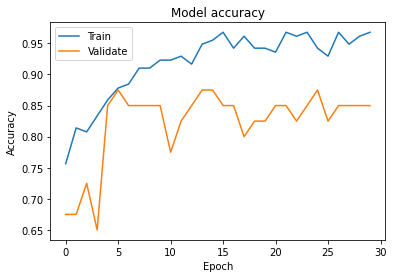

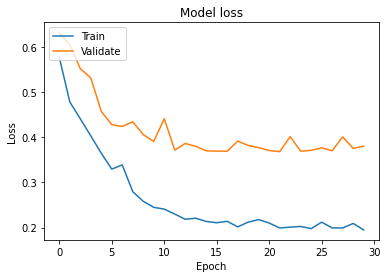

F1-Score: 66.66666666666666
Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_91 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_180 (TimeDist  (None, 10, 150, 8)  32          ['input_91[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_181 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_180[0][0]']   
 ributed)                                                      

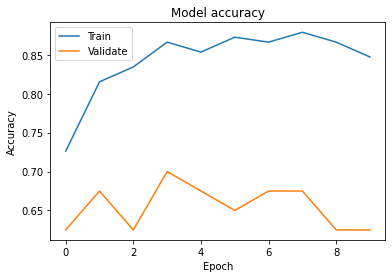

F1-Score: 18.181818181818183
Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_93 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_184 (TimeDist  (None, 10, 150, 8)  32          ['input_93[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_185 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_184[0][0]']   
 ributed)                                                     

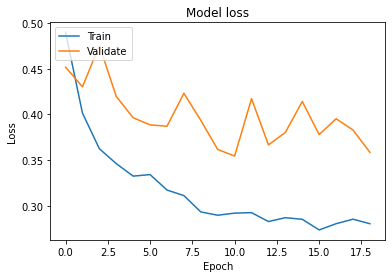

F1-Score: 62.5
Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_95 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_188 (TimeDist  (None, 10, 150, 8)  32          ['input_95[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_189 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_188[0][0]']   
 ributed)                                                                   

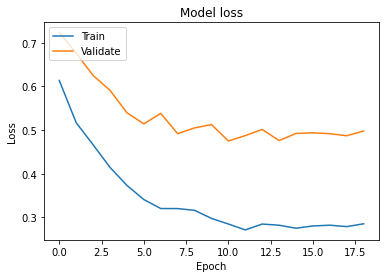

F1-Score: 15.384615384615385
Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_97 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_192 (TimeDist  (None, 10, 150, 8)  32          ['input_97[0][0]']               
 ributed)                                                                                         
                                                                                                  
 time_distributed_193 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_192[0][0]']   
 ributed)                                                     

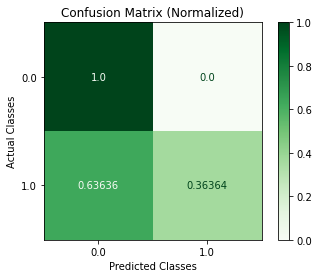

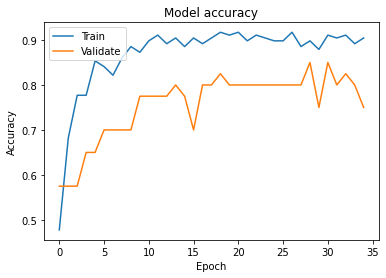

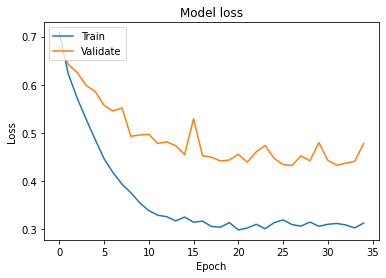

F1-Score: 53.333333333333336
MODEL-------------
{'Accuracy': '0.841+-0.04', 'Sensitivity': '0.311+-0.19', 'Specificity': '0.99+-0.01', 'F1-Score': '0.432+-0.22', 'MCC': '0.445+-0.2', 'AUC': [], 'PPV': '0.871+-0.19', 'NPV': '0.838+-0.03'}


In [ ]:
kfold_dnn_dp(X_signals_binary, prv_data, y_ppg, summary=True, plotme=True, strat=5, binary=True)

## Machine Learning

In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm

def train_test_experiments(x, y, augment=None, summary=False, hyper=False, plotme=False, strat=2, binary=True):
  lgb_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  knn_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  xgb_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  rand_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  lr_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  svc_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  cat_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}
  gnb_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[], 'FPR':[], 'LS':[]}


  #Ensemble methods
  cat = CatBoostClassifier(verbose=False)
  lgb = LGBMClassifier()
  rand = RandomForestClassifier()
  xgb = XGBClassifier()

  #Traditional Methods
  svc_model = SVC(probability=True)
  lr = LogisticRegression(solver='lbfgs', max_iter=1000)
  knn = KNeighborsClassifier()
  gnb = GaussianNB()

  if hyper is True:
    cat_params ={'objective': 'CrossEntropy', 'colsample_bylevel': 0.02301706907879572, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.423955639237552}
    lgb_params = {'booster': 'gbtree', 'lambda': 8.213725031463054e-05, 'alpha': 2.446026948967157e-07, 'max_depth': 6, 'eta': 5.4296643992689906e-08, 'gamma': 2.140857401353193e-06, 'grow_policy': 'lossguide'}
    rand_params ={'n_estimators': 1230, 'max_depth': 34.19294147464841, 'min_samples_leaf': 10, 'min_samples_split': 119}
    xgb_params = {'booster': 'gbtree', 'lambda': 2.3356284128494518e-07, 'alpha': 0.04646457042387098, 'max_depth': 6, 'eta': 1.0785511701153606e-05, 'gamma': 5.0658213381437575e-05, 'grow_policy': 'depthwise'}
    svc_params ={'kernel': 'linear', 'gamma': 1.1874371829234498, 'C': 0.05636457899408995}
    lr_params ={'C': 7539.858073807093}
    knn_params ={'leaf_size': 45, 'n_neighbors': 30, 'p': 1}

    cat = CatBoostClassifier(**cat_params, verbose=False)
    lgb = LGBMClassifier(**lgb_params)
    rand = RandomForestClassifier(**rand_params)
    xgb = XGBClassifier(**xgb_params)

    #Traditional Methods
    svc_model = SVC(**svc_params, probability=True)
    lr = LogisticRegression(**lr_params, solver='lbfgs', max_iter=1000)
    knn = KNeighborsClassifier(**knn_params)
 
        
  # #ensemble
  pipe_lgb = Pipeline([
  ('lgb', lgb)
  ])

  pipe_cat = Pipeline([
  ('cat', cat)
  ])

  pipe_rand = Pipeline([
  ('rand', rand)
  ])

  pipe_xgb = Pipeline([
  ('xgb', xgb)
  ])

  #traditional
  pipe_knn = Pipeline([
  ('knn', knn)
  ])

  pipe_svc = Pipeline([
  ('svc', svc_model)
  ])

  pipe_lr = Pipeline([
  ('lr', lr)
  ])

  pipe_gnb = Pipeline([
  ('gnb', gnb)
  ])


  
  pipelines = [pipe_lgb, pipe_cat, pipe_rand, pipe_xgb, pipe_knn, pipe_svc, pipe_lr, pipe_gnb]
  pipe_dict = {0: 'Light Gradient Boosting', 1: 'Catboost', 2: 'Random Forest', 3:'XG Boost', 4:'K-Nearest Neighbors', 5:'Support Vector Machines', 6:'Logistic Regression ', 7: 'GNB'}
  pipe_metrics={0:lgb_metrics, 1:cat_metrics, 2:rand_metrics, 3:xgb_metrics, 4:knn_metrics, 5:svc_metrics, 6:lr_metrics, 7:gnb_metrics}

  epoch_start = time.time()

  kf = StratifiedKFold(strat, shuffle=True, random_state=42)
  for train, test in kf.split(x, y):
      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]

      # x_train = x_train.to_numpy()
      # x_test = x_test.to_numpy()
      
      sde = StandardScaler()
      x_train = sde.fit_transform(x_train)
      x_test = sde.transform(x_test)
          
      if augment is not None:
            counter = Counter(y_train)
            print("Before train augmentation:"  +  str(counter))
            x_train,y_train = augment.fit_resample(x_train, y_train)
            counter = Counter(y_train)
            print("After train augmentation:"  +  str(counter))

      for pipe in pipelines:
        pipe.fit(x_train, y_train.astype(np.float64))
      epoch_elapsed = time.time()-epoch_start

      for i,model in enumerate(pipelines):
          y_pred = model.predict(x_test)
          cm = pycm.ConfusionMatrix(actual_vector=np.array(y_test.astype(np.float)), predict_vector=np.array(y_pred.astype(np.float)))
          if binary:
            pipe_metrics[i]['Accuracy'].append(cm.class_stat['ACC'][1])
            pipe_metrics[i]['Sensitivity'].append(cm.class_stat['TPR'][1])
            pipe_metrics[i]['Specificity'].append(cm.class_stat['TNR'][1])
            pipe_metrics[i]['PPV'].append(cm.class_stat['PPV'][1])
            pipe_metrics[i]['F1-Score'].append(cm.class_stat['F1'][1])
            pipe_metrics[i]['NPV'].append(cm.class_stat['NPV'][1])
            pipe_metrics[i]['MCC'].append(cm.class_stat['MCC'][1])
            pipe_metrics[i]['AUC'].append(cm.class_stat['AUC'][1])
          else:
            pipe_metrics[i]['Accuracy'].append(cm.overall_stat['ACC Macro'])
            pipe_metrics[i]['Sensitivity'].append(cm.overall_stat['TPR Macro'])
            pipe_metrics[i]['Specificity'].append(cm.overall_stat['TNR Macro'])
            pipe_metrics[i]['PPV'].append(cm.overall_stat['PPV Macro'])
            pipe_metrics[i]['F1-Score'].append(cm.overall_stat['F1 Macro'])
            pipe_metrics[i]['MCC'].append(cm.overall_stat['Overall MCC'])
          if plotme == True:
            print(cm)
            cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")
            print(pipe_metrics[i])
       


  if summary:
    for i,model in enumerate(pipelines):
        #Accuracy
        try:
          if binary:
            mu = np.mean([x for x in pipe_metrics[i]['Accuracy']])
            sigma = np.std([x for x in pipe_metrics[i]['Accuracy']])
            pipe_metrics[i]['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in pipe_metrics[i]['Sensitivity']])
            sigma = np.std([x for x in pipe_metrics[i]['Sensitivity']])
            pipe_metrics[i]['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in pipe_metrics[i]['Specificity']])
            sigma = np.std([x for x in pipe_metrics[i]['Specificity']])
            pipe_metrics[i]['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #PPV
            mu = np.mean([x for x in pipe_metrics[i]['PPV']])
            sigma = np.std([x for x in pipe_metrics[i]['PPV']])
            pipe_metrics[i]['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #F1-Score
            mu = np.mean([x for x in pipe_metrics[i]['F1-Score']])
            sigma = np.std([x for x in pipe_metrics[i]['F1-Score']])
            pipe_metrics[i]['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC
            mu = np.mean([x for x in pipe_metrics[i]['MCC']])
            sigma = np.std([x for x in pipe_metrics[i]['MCC']])
            pipe_metrics[i]['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV
            mu = np.mean([x for x in pipe_metrics[i]['NPV']])
            sigma = np.std([x for x in pipe_metrics[i]['NPV']])
            pipe_metrics[i]['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #AUC
            mu = np.mean([x for x in pipe_metrics[i]['AUC']])
            sigma = np.std([x for x in pipe_metrics[i]['AUC']])
            pipe_metrics[i]['AUC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
          else:
            mu = np.mean([x for x in pipe_metrics[i]['Accuracy']])
            sigma = np.std([x for x in pipe_metrics[i]['Accuracy']])
            pipe_metrics[i]['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in pipe_metrics[i]['Sensitivity']])
            sigma = np.std([x for x in pipe_metrics[i]['Sensitivity']])
            pipe_metrics[i]['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in pipe_metrics[i]['Specificity']])
            sigma = np.std([x for x in pipe_metrics[i]['Specificity']])
            pipe_metrics[i]['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #PPV
            mu = np.mean([x for x in pipe_metrics[i]['PPV']])
            sigma = np.std([x for x in pipe_metrics[i]['PPV']])
            pipe_metrics[i]['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #F1-Score
            mu = np.mean([x for x in pipe_metrics[i]['F1-Score']])
            sigma = np.std([x for x in pipe_metrics[i]['F1-Score']])
            pipe_metrics[i]['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC
            mu = np.mean([x for x in pipe_metrics[i]['MCC']])
            sigma = np.std([x for x in pipe_metrics[i]['MCC']])
            pipe_metrics[i]['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
        except:
          pass

  print("LGB-------------")
  print(lgb_metrics)     
  print("RF-------------")
  print(rand_metrics)
  print("XGB------------")
  print(xgb_metrics)
  print("KNN-------------")
  print(knn_metrics)
  print("SVC-------------")
  print(svc_metrics)
  print("LR-------------")
  print(lr_metrics)
  print("CB-------------")
  print(cat_metrics)
  print("GNB-------------")
  print(gnb_metrics)


In [ ]:
train_test_experiments(X_signals_binary, y_ppg, augment=None, summary=True, hyper=False, plotme=True, strat=5, binary=True)

# Checking NN sizes (PPG)

In [ ]:
x = X_signals_binary
x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
model = cnn_1d(x)
model.fit(x, y_ppg, epochs=1)
print(model.summary())

x = x.reshape(x.shape[0], int(x.shape[1]/150), 150) #for LSTM

model = lstm_vanilla(x)
model.fit(x, y_ppg, epochs=1)
print(model.summary())

model = lstm_bidirection(x)
model.fit(x, y_ppg, epochs=1)
print(model.summary())


model = cnn_lstm(x)
model.fit(x, y_ppg, epochs=1)
print(model.summary())

model = cnn_bilstm_attn(x)
model.fit(x, y_ppg, epochs=1)
print(model.summary())


# TabNet Machine Learning

In [ ]:
# hide
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# hide
import multiprocessing as mp

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow_addons.activations import sparsemax

%matplotlib inline

In [ ]:
def GLU(x):
    return x * tf.sigmoid(x)

class FCBlock(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.layer = layers.Dense(units)
        self.bn = layers.BatchNormalization()

    def call(self, x):
        return GLU(self.bn(self.layer(x)))

In [ ]:
class SharedBlock(layers.Layer):
    def __init__(self, units, mult=tf.sqrt(0.5)):
        super().__init__()
        self.layer1 = FCBlock(units)
        self.layer2 = FCBlock(units)
        self.mult = mult

    def call(self, x):
        out1 = self.layer1(x)
        out2 = self.layer2(out1)
        return out2 + self.mult * out1

class DecisionBlock(SharedBlock):
    def __init__(self, units, mult=tf.sqrt(0.5)):
        super().__init__(units, mult)

    def call(self, x):
        out1 = x * self.mult + self.layer1(x)
        out2 = out1 * self.mult + self.layer2(out1)
        return out2

In [ ]:
class Prior(layers.Layer):
    def __init__(self, gamma=1.1):
        super().__init__()
        self.gamma = gamma

    def reset(self):
        self.P = 1.0

    def call(self, mask):
        self.P = self.P * (self.gamma - mask)
        return self.P

In [ ]:
class AttentiveTransformer(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.layer = layers.Dense(units)
        self.bn = layers.BatchNormalization()

    def call(self, x, prior):
        return sparsemax(prior * self.bn(self.layer(x)))

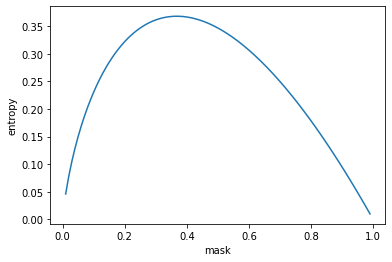

In [ ]:
#hide_input
p = np.arange(0.01, 1, 0.01)
e = - p * np.log(p)
plt.plot(p, e)
plt.xlabel("mask")
plt.ylabel("entropy")
plt.show()

In [ ]:
# collapse
class TabNet(keras.Model):
    def __init__(self, input_dim, output_dim, steps, n_d, n_a, gamma=1.3):
        super().__init__()
        # hyper-parameters
        self.n_d, self.n_a, self.steps = n_d, n_a, steps
        # input-normalisation
        self.bn = layers.BatchNormalization()
        # Feature Transformer
        self.shared = SharedBlock(n_d+n_a)
        self.first_block = DecisionBlock(n_d+n_a)
        self.decision_blocks = [DecisionBlock(n_d+n_a)] * steps
        # Attentive Transformer
        self.attention = [AttentiveTransformer(input_dim)] * steps
        self.prior_scale = Prior(gamma)
        # final layer
        self.final = layers.Dense(output_dim)

        self.eps = 1e-8
        self.add_layer = layers.Add()

    @tf.function
    def call(self, x):
        self.prior_scale.reset()
        final_outs = []
        mask_losses = []

        x = self.bn(x)
        attention = self.first_block(self.shared(x))[:,:self.n_a]
        for i in range(self.steps):
            mask = self.attention[i](attention, self.prior_scale.P)
            entropy = mask * tf.math.log(mask + self.eps)
            mask_losses.append(
                -tf.reduce_sum(entropy, axis=-1) / self.steps
            )

            prior = self.prior_scale(mask)
            out = self.decision_blocks[i](self.shared(x * prior))
            attention, output = out[:,:self.n_a], out[:,self.n_a:]
            final_outs.append(tf.nn.relu(output))

        final_out = self.add_layer(final_outs)
        mask_loss = self.add_layer(mask_losses)

        return self.final(final_out), mask_loss

    def mask_importance(self, x):
        self.prior_scale.reset()
        feature_importance = 0

        x = self.bn(x)
        attention = self.first_block(self.shared(x))[:,:self.n_a]
        for i in range(self.steps):
            mask = self.attention[i](attention, self.prior_scale.P)

            prior = self.prior_scale(mask)
            out = self.decision_blocks[i](self.shared(x * prior))
            attention, output = out[:,:self.n_a], out[:,self.n_a:]
            step_importance = tf.reduce_sum(tf.nn.relu(output), axis=1, keepdims=True)
            feature_importance += mask * step_importance

        return feature_importance

In [ ]:
# collapse
from keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

sce = BinaryCrossentropy(from_logits=True)
reg_sparse = 0.01
def full_loss(y_true, y_pred):
    logits, mask_loss = y_pred
    return sce(y_true, logits) + reg_sparse * mask_loss.mean()

# collapse
def mask_loss(y_true, mask_losses):
    return tf.reduce_mean(mask_losses)


In [ ]:
hrv_data

print(y.reshape(y.shape[0], 1).shape)
prv_imputed
y_ppg

(8362, 1)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
concat = np.concatenate((hrv_data,y.reshape(y.shape[0], 1)), axis=1)
print(concat.shape)
hrv_cols = ['rmssd', 'meanRR', 'sdnn', 'cvnn', 'cvsd', 'medianNN', 'madNN', 'mcvNN',
       'pnn50', 'pnn20', 'csi', 'sampen', 'apen', 'cvi', 'cvi_m', 'SDSD',
       'TINN', 'SHAN', 'FUZZY', 'MSE', 'CMSE', 'CD', 'HFD', 'KFD', 'LZC',
       'DFA', 'Class']
     
hrv_excel = pd.DataFrame(concat, columns=hrv_cols)
hrv_excel.to_csv("/content/drive/MyDrive/P13-ExplainHeart/hrvwithlabel.csv")
hrv_excel.groupby('Class').describe()


(16890, 27)


rmssd                                                             \
         count        mean         std        min         25%         50%   
Class                                                                       
0.0    11737.0  131.253635  227.306843   7.669650   39.513166   88.844433   
1.0     5153.0  235.471201  187.389968  28.069179  178.130885  212.602916   

                                  meanRR              ...       LZC            \
              75%           max    count        mean  ...       75%       max   
Class                                                 ...                       
0.0    166.332999  12693.866808  11737.0  797.672866  ...  1.223464  1.707895   
1.0    250.699023   5855.649694   5153.0  641.570971  ...  1.320852  1.698736   

           DFA                                                              \
         count      mean       std       min       25%       50%       75%   
Class                                                                        
0.0    11737.0  0.499904  0.307900 -2.786660  0.284557  0.464649  0.703274   
1.0     5153.0  0.617200  0.176369 -1.224291  0.499600  0.610103  0.730656   

                 
            max  
Class            
0.0    1.751833  
1.0    1.302186  

[2 rows x 208 columns]

In [ ]:
concat = np.concatenate((prv_imputed,y_ppg.reshape(y_ppg.shape[0], 1)), axis=1)
print(concat.shape)
hrv_cols = ['rmssd', 'meanRR', 'sdnn', 'cvnn', 'cvsd', 'medianNN', 'madNN', 'mcvNN',
       'pnn50', 'pnn20', 'csi', 'sampen', 'apen', 'cvi', 'cvi_m', 'SDSD',
       'TINN', 'SHAN', 'FUZZY', 'MSE', 'CMSE', 'CD', 'HFD', 'KFD', 'LZC',
       'DFA', 'Class']
prv_excel = pd.DataFrame(concat, columns=hrv_cols)
prv_excel.to_csv("/content/drive/MyDrive/P13-ExplainHeart/prvwithlabel.csv")
prv_excel.groupby('Class').describe()

(246, 27)


rmssd                                                              \
       count        mean         std         min         25%         50%   
Class                                                                      
0.0    192.0  172.257135  105.082816   15.021352   91.235208  170.924805   
1.0     54.0  269.847108   65.802292  122.335006  224.990478  264.454399   

                              meanRR              ...       LZC            \
              75%         max  count        mean  ...       75%       max   
Class                                             ...                       
0.0    244.941999  446.128647  192.0  884.640872  ...  1.374083  1.598128   
1.0    315.092822  441.529329   54.0  768.470116  ...  1.379711  1.545221   

         DFA                                                             \
       count      mean      std       min       25%       50%       75%   
Class                                                                     
0.0    192.0  0.505274  0.28443 -0.001149  0.301322  0.455536  0.663859   
1.0     54.0  0.617189  0.15379  0.316976  0.515750  0.617174  0.730115   

                 
            max  
Class            
0.0    1.360380  
1.0    1.022097  

[2 rows x 208 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(hrv_data, y, test_size=0.20, shuffle=False, random_state=69)

x_train = x_train.reshape((len(x_train), -1)).astype(np.float32)
x_test = x_test.reshape((len(x_test), -1)).astype(np.float32)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/vitaminA.csv')
cat_features = ['Iteching', 'BlephritisA', 'ConjuctivitisA', 'CataractA', 'TrumaA','PtosisA', 'PthysisA', 'ALTsquint', 'nystugmus','Amloypia', 'Emixed', 'CBlephritis', 'CConjuctivitis', 'Nightblind','Gender', 'Myopia', 'hyperopia', 'Stigmatisim']
num_features = ['Age','REspherical', 'LEspherical','REcylinder', 'LEcylinder', 'REaxis', 'LEaxis', 'VAR', 'VAL']

label = "VitaminAA"

feats = cat_features + num_features
X = df[feats].to_numpy()
y = df[label].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=221)

model = LGBMClassifier(is_unbalance=True)
model.fit(X_train, y_train)

X_train = np.array(X_train, dtype=np.double)
X_val = np.array(X_val, dtype=np.double)

X_train = pd.DataFrame(X_train, columns=feats)
X_test = pd.DataFrame(X_val, columns=feats)

explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_train[:100])
shap.summary_plot(shap_values, X_train[:100], show=True, plot_size='auto')
plt.show()


In [ ]:

model = TabNet(26, 1, 2, 10, 10, 1.3)
model.compile(
    'Adam', 
    loss=[sce, mask_loss],
    loss_weights=[1, 0.01]
)
model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.15,
    workers=mp.cpu_count()
)

Epoch 1/10
356/356 [==============================] - 11s 18ms/step - loss: 0.2083 - output_1_loss: 0.1992 - output_2_loss: 0.9150 - val_loss: 2.6261 - val_output_1_loss: 2.6172 - val_output_2_loss: 0.8888
Epoch 2/10
356/356 [==============================] - 5s 14ms/step - loss: 0.1131 - output_1_loss: 0.1046 - output_2_loss: 0.8551 - val_loss: 3.1727 - val_output_1_loss: 3.1641 - val_output_2_loss: 0.8572
Epoch 3/10
356/356 [==============================] - 5s 14ms/step - loss: 0.0920 - output_1_loss: 0.0839 - output_2_loss: 0.8036 - val_loss: 3.4695 - val_output_1_loss: 3.4615 - val_output_2_loss: 0.7987
Epoch 4/10
356/356 [==============================] - 5s 14ms/step - loss: 0.0894 - output_1_loss: 0.0818 - output_2_loss: 0.7652 - val_loss: 3.5025 - val_output_1_loss: 3.4948 - val_output_2_loss: 0.7777
Epoch 5/10
356/356 [==============================] - 5s 14ms/step - loss: 0.0841 - output_1_loss: 0.0768 - output_2_loss: 0.7269 - val_loss: 3.8080 - val_output_1_loss: 3.8006 - 

In [ ]:
# collapse
y_pred = model.predict(x_test)[0].argmax(axis=-1)
(y_pred == y_test).mean()

0.452480573819486

# Knowledge Distillation (PPG)

In [ ]:

class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(teacher_predictions/self.temperature,student_predictions/self.temperature)
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [ ]:
from sklearn.pipeline import Pipeline      
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, recall_score, precision_score,roc_auc_score,matthews_corrcoef
import imblearn
import pycm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
callbacks = [
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
    #        patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

def kfold_knowledge(x, x2, y, summary=False, plotme=False, strat=2, binary=False):

  teacher_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  distilled_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  student_metrics = {'Accuracy':[], 'Sensitivity':[], 'Specificity':[], 'F1-Score':[], 'MCC':[], 'AUC':[], 'PPV':[], 'NPV':[]}
  epoch_start = time.time()

  x = x.reshape(x.shape[0], int(x.shape[1]/150), 150)
  # x = x.reshape(x.shape[0], x.shape[1], 1) #for CNN
  kf = StratifiedKFold(strat, shuffle=True, random_state=2)
  for train, test in kf.split(x, y):

    
      # Create the teacher -------------------------------------------------------------------------------------
  

      # Create the student
      student = mm_cnn_lstn_simple_ppg(x, x2)


      model_name = 'new_cnn_hrv_95.14189514189513'
      json_file = open('/content/drive/MyDrive/P13-ExplainHeart/{}.json'.format(model_name), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      teacher = keras.models.model_from_json(loaded_model_json, custom_objects={'Attention':Attention(return_sequences=False), 'TimeDistributed': TimeDistributed, 'Bidirectional': Bidirectional})
      teacher.load_weights('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
      # for layer in loaded_model.layers[:-6]:
      #   layer.trainable = False
      # teacher.set_weights(loaded_model.get_weights()) 
      for layer in teacher.layers[:-4]:
        print(layer)
        layer.trainable = False
        print(layer.trainable)
      # Create the teacher -------------------------------------------------------------------------------------
      teacher.compile(
          optimizer='adam',
          loss="binary_crossentropy",
          # loss=keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=["accuracy"])   


      try:
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        x2_train = x2.iloc[train]
        x2_test = x2.iloc[test]
        y_train = y[train]
        y_test = y[test]
      except:
        x_train = x[train]
        x_test = x[test]
        x2_train = x2[train]
        x2_test = x2[test]
        y_train = y[train]
        y_test = y[test]
     


      x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x_train, x2_train, y_train, test_size=0.20, shuffle=False, random_state=69)

      sde = StandardScaler()
      x1_original = sde.fit_transform(x1_original.reshape(x1_original.shape[0], -1)).reshape(x1_original.shape)

      x1_holdout = sde.transform(x1_holdout.reshape(x1_holdout.shape[0], -1)).reshape(x1_holdout.shape)

      x_test = sde.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

      sde = StandardScaler()

      x2_original = sde.fit_transform(x2_original)

      x2_holdout = sde.transform(x2_holdout)

      x2_test = sde.transform(x2_test)


     #-------------------------------------------------------------------------TEACHER------------------------------------------------------------------#
      history = teacher.fit([x1_original, x2_original], y_original, epochs=40, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = teacher.predict([x_test, x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

      teacher_metrics['Accuracy'].append(cm1.class_stat['ACC'][1])
      teacher_metrics['Sensitivity'].append(cm1.class_stat['TPR'][1])
      teacher_metrics['Specificity'].append(cm1.class_stat['TNR'][1])
      teacher_metrics['F1-Score'].append(cm1.class_stat['F1'][1])
      teacher_metrics['MCC'].append(cm1.class_stat['MCC'][1])
      teacher_metrics['PPV'].append(cm1.class_stat['PPV'][1])
      teacher_metrics['NPV'].append(cm1.class_stat['NPV'][1])
      #-----------------------------------------------------------------------------------------------------------------------------------------------------#
      
     #-------------------------------------------------------------------------DISTILLATION------------------------------------------------------------------#

      distiller = Distiller(student=student, teacher=teacher)
      distiller.compile(
            optimizer="adam",
            metrics=["accuracy"],
            student_loss_fn=keras.losses.BinaryCrossentropy(from_logits=False),
            distillation_loss_fn=keras.losses.BinaryCrossentropy(from_logits=False),          
            alpha=0.1,temperature=5)
      history = distiller.fit([x1_original, x2_original], y_original, epochs=40, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = student.predict([x_test, x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
          
      distilled_metrics['Accuracy'].append(cm1.class_stat['ACC'][1])
      distilled_metrics['Sensitivity'].append(cm1.class_stat['TPR'][1])
      distilled_metrics['Specificity'].append(cm1.class_stat['TNR'][1])
      distilled_metrics['F1-Score'].append(cm1.class_stat['F1'][1])
      distilled_metrics['MCC'].append(cm1.class_stat['MCC'][1])
      distilled_metrics['PPV'].append(cm1.class_stat['PPV'][1])
      distilled_metrics['NPV'].append(cm1.class_stat['NPV'][1])
      #-----------------------------------------------------------------------------------------------------------------------------------------------------#
    #-------------------------------------------------------------------------STUDENT------------------------------------------------------------------#
     
      # Clone student for later comparison
      student_scratch =  mm_cnn_lstn_simple_ppg_duplicate(x, x2)

      student_scratch.compile(
      optimizer="adam",
      loss=keras.losses.BinaryCrossentropy(from_logits=False),
      metrics=["accuracy"],)

      history = student_scratch.fit([x1_original, x2_original], y_original, epochs=40, batch_size=16, validation_data=([x1_holdout,x2_holdout], y_holdout), verbose=1)
      epoch_elapsed = time.time()-epoch_start
      y_pred = student_scratch.predict([x_test, x2_test])
      if binary:
          y_pred = (y_pred > 0.5).astype("int32")
          y_pred = np.ravel(y_pred) 
      else:
        y_pred = np.argmax(y_pred, axis=1)
      cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_test).astype(float), predict_vector=np.array(y_pred).astype(float))
      if plotme == True:
            cm1.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="matplotlib")
            plt.show()
            #plot accuracy vs epoch
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

            # Plot loss values vs epoch
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validate'], loc='upper left')
            plt.show()

      student_metrics['Accuracy'].append(cm1.class_stat['ACC'][1])
      student_metrics['Sensitivity'].append(cm1.class_stat['TPR'][1])
      student_metrics['Specificity'].append(cm1.class_stat['TNR'][1])
      student_metrics['F1-Score'].append(cm1.class_stat['F1'][1])
      student_metrics['MCC'].append(cm1.class_stat['MCC'][1])
      student_metrics['PPV'].append(cm1.class_stat['PPV'][1])
      student_metrics['NPV'].append(cm1.class_stat['NPV'][1])
     #-----------------------------------------------------------------------------------------------------------------------------------------------------#
  if summary:
        #Accuracy
        try:
            mu = np.mean([x for x in teacher_metrics['Accuracy']])
            sigma = np.std([x for x in teacher_metrics['Accuracy']])
            teacher_metrics['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in teacher_metrics['Sensitivity']])
            sigma = np.std([x for x in teacher_metrics['Sensitivity']])
            teacher_metrics['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in teacher_metrics['Specificity']])
            sigma = np.std([x for x in teacher_metrics['Specificity']])
            teacher_metrics['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in teacher_metrics['F1-Score']])
            sigma = np.std([x for x in teacher_metrics['F1-Score']])
            teacher_metrics['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in teacher_metrics['MCC']])
            sigma = np.std([x for x in teacher_metrics['MCC']])
            teacher_metrics['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in teacher_metrics['PPV']])
            sigma = np.std([x for x in teacher_metrics['PPV']])
            teacher_metrics['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in teacher_metrics['NPV']])
            sigma = np.std([x for x in teacher_metrics['NPV']])
            teacher_metrics['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass
        try:
            mu = np.mean([x for x in distilled_metrics['Accuracy']])
            sigma = np.std([x for x in distilled_metrics['Accuracy']])
            distilled_metrics['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in distilled_metrics['Sensitivity']])
            sigma = np.std([x for x in distilled_metrics['Sensitivity']])
            distilled_metrics['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in distilled_metrics['Specificity']])
            sigma = np.std([x for x in distilled_metrics['Specificity']])
            distilled_metrics['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in distilled_metrics['F1-Score']])
            sigma = np.std([x for x in distilled_metrics['F1-Score']])
            distilled_metrics['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in distilled_metrics['MCC']])
            sigma = np.std([x for x in distilled_metrics['MCC']])
            distilled_metrics['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in distilled_metrics['PPV']])
            sigma = np.std([x for x in distilled_metrics['PPV']])
            distilled_metrics['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in distilled_metrics['NPV']])
            sigma = np.std([x for x in distilled_metrics['NPV']])
            distilled_metrics['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass
        try:
            mu = np.mean([x for x in student_metrics['Accuracy']])
            sigma = np.std([x for x in student_metrics['Accuracy']])
            student_metrics['Accuracy'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Sensitivity
            mu = np.mean([x for x in student_metrics['Sensitivity']])
            sigma = np.std([x for x in student_metrics['Sensitivity']])
            student_metrics['Sensitivity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #Specificity
            mu = np.mean([x for x in student_metrics['Specificity']])
            sigma = np.std([x for x in student_metrics['Specificity']])
            student_metrics['Specificity'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
            
            #F1-Score
            mu = np.mean([x for x in student_metrics['F1-Score']])
            sigma = np.std([x for x in student_metrics['F1-Score']])
            student_metrics['F1-Score'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #MCC-Score
            mu = np.mean([x for x in student_metrics['MCC']])
            sigma = np.std([x for x in student_metrics['MCC']])
            student_metrics['MCC'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))
                    
            #PPV-Score
            mu = np.mean([x for x in student_metrics['PPV']])
            sigma = np.std([x for x in student_metrics['PPV']])
            student_metrics['PPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

            #NPV-Score
            mu = np.mean([x for x in student_metrics['NPV']])
            sigma = np.std([x for x in student_metrics['NPV']])
            student_metrics['NPV'] = str(round(mu,3)) + '+-' + str(round(sigma, 2))

        except:
          pass

  print("TEACHER METRICS-------------")
  print(teacher_metrics)   

  print("DISTILLED METRICS-------------")
  print(distilled_metrics)   

  print("STUDENT METRICS-------------")
  print(student_metrics)   



Model: "model_148"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_303 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_612 (TimeDist  (None, 10, 150, 8)  32          ['input_303[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_613 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_612[0][0]']   
 ributed)                                                                                 

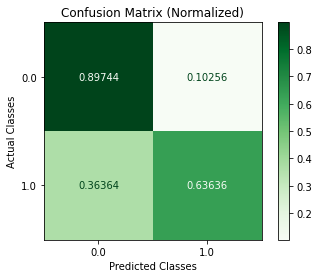

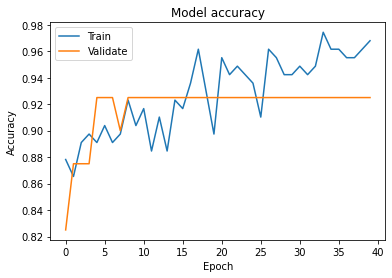

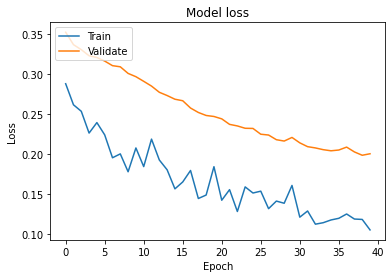

Epoch 1/40
10/10 [==============================] - 6s 104ms/step - accuracy: 0.7564 - student_loss: 0.6145 - distillation_loss: 0.1864 - val_accuracy: 0.6750 - val_student_loss: 0.3747
Epoch 2/40
10/10 [==============================] - 0s 11ms/step - accuracy: 0.8013 - student_loss: 0.5094 - distillation_loss: 0.1664 - val_accuracy: 0.7000 - val_student_loss: 0.3876
Epoch 3/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8077 - student_loss: 0.4640 - distillation_loss: 0.1624 - val_accuracy: 0.7000 - val_student_loss: 0.3660
Epoch 4/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8269 - student_loss: 0.4033 - distillation_loss: 0.1450 - val_accuracy: 0.7000 - val_student_loss: 0.3016
Epoch 5/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8077 - student_loss: 0.3793 - distillation_loss: 0.1464 - val_accuracy: 0.7250 - val_student_loss: 0.2636
Epoch 6/40
10/10 [==============================] - 0s 11ms/step - accurac

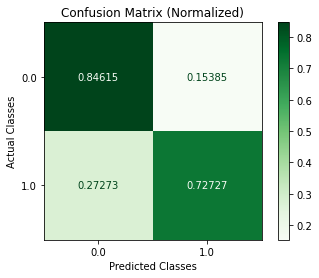

Model: "model_149"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_305 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_616 (TimeDist  (None, 10, 150, 8)  32          ['input_305[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_617 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_616[0][0]']   
 ributed)                                                                                 

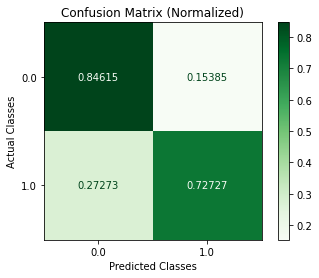

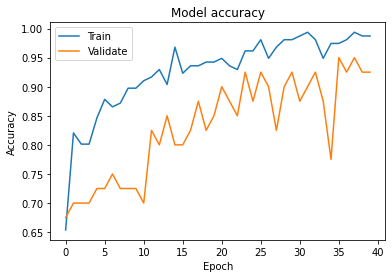

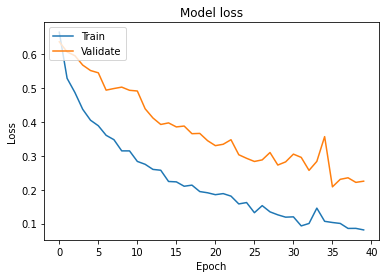

Model: "model_150"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_307 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_620 (TimeDist  (None, 10, 150, 8)  32          ['input_307[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_621 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_620[0][0]']   
 ributed)                                                                                 

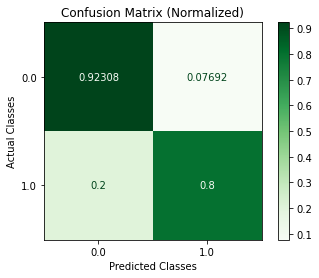

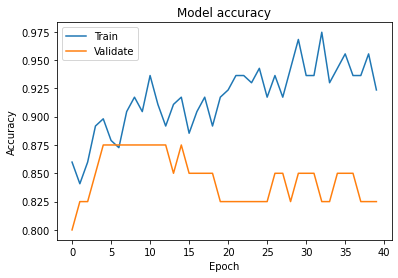

Epoch 1/40
10/10 [==============================] - 8s 112ms/step - accuracy: 0.7962 - student_loss: 0.4802 - distillation_loss: 0.1620 - val_accuracy: 0.7000 - val_student_loss: 0.3226
Epoch 2/40
10/10 [==============================] - 0s 13ms/step - accuracy: 0.8217 - student_loss: 0.4449 - distillation_loss: 0.1639 - val_accuracy: 0.7000 - val_student_loss: 0.2396
Epoch 3/40
10/10 [==============================] - 0s 13ms/step - accuracy: 0.8025 - student_loss: 0.4058 - distillation_loss: 0.1599 - val_accuracy: 0.7000 - val_student_loss: 0.2029
Epoch 4/40
10/10 [==============================] - 0s 13ms/step - accuracy: 0.8344 - student_loss: 0.3753 - distillation_loss: 0.1488 - val_accuracy: 0.6750 - val_student_loss: 0.1955
Epoch 5/40
10/10 [==============================] - 0s 13ms/step - accuracy: 0.8344 - student_loss: 0.3498 - distillation_loss: 0.1415 - val_accuracy: 0.6750 - val_student_loss: 0.1698
Epoch 6/40
10/10 [==============================] - 0s 12ms/step - accurac

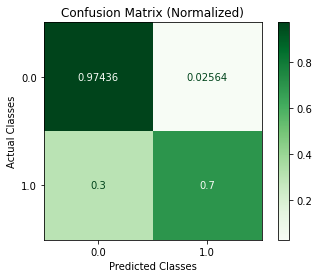

Model: "model_151"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_309 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_624 (TimeDist  (None, 10, 150, 8)  32          ['input_309[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_625 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_624[0][0]']   
 ributed)                                                                                 

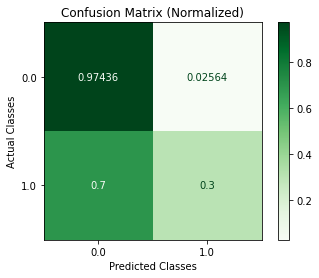

Model: "model_152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_311 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_628 (TimeDist  (None, 10, 150, 8)  32          ['input_311[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_629 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_628[0][0]']   
 ributed)                                                                                 

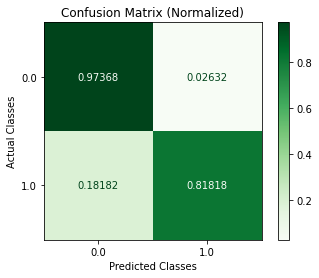

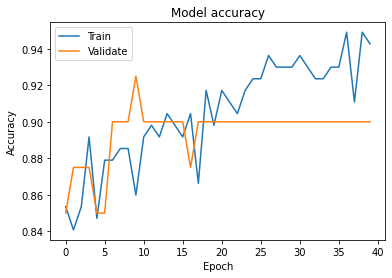

Epoch 1/40
10/10 [==============================] - 6s 106ms/step - accuracy: 0.6051 - student_loss: 0.6800 - distillation_loss: 0.1827 - val_accuracy: 0.5250 - val_student_loss: 0.5609
Epoch 2/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.7134 - student_loss: 0.5833 - distillation_loss: 0.1800 - val_accuracy: 0.5500 - val_student_loss: 0.4850
Epoch 3/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.7834 - student_loss: 0.5516 - distillation_loss: 0.1768 - val_accuracy: 0.6500 - val_student_loss: 0.4155
Epoch 4/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8089 - student_loss: 0.4834 - distillation_loss: 0.1568 - val_accuracy: 0.7000 - val_student_loss: 0.3539
Epoch 5/40
10/10 [==============================] - 0s 13ms/step - accuracy: 0.8408 - student_loss: 0.4486 - distillation_loss: 0.1606 - val_accuracy: 0.7000 - val_student_loss: 0.3326
Epoch 6/40
10/10 [==============================] - 0s 13ms/step - accurac

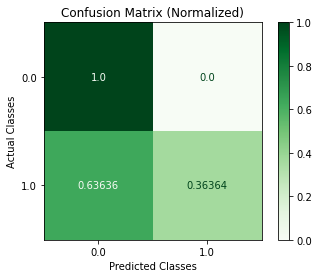

Model: "model_153"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_313 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_632 (TimeDist  (None, 10, 150, 8)  32          ['input_313[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_633 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_632[0][0]']   
 ributed)                                                                                 

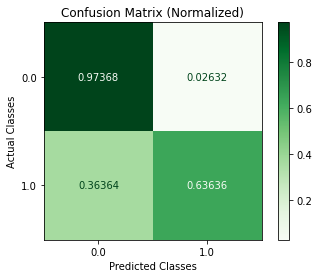

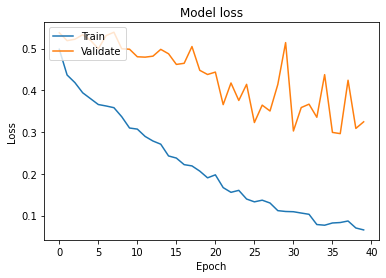

Model: "model_154"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_315 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_636 (TimeDist  (None, 10, 150, 8)  32          ['input_315[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_637 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_636[0][0]']   
 ributed)                                                                                 

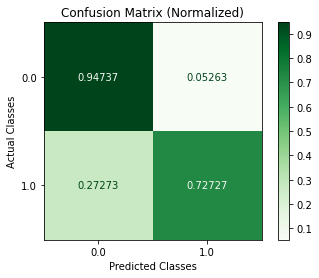

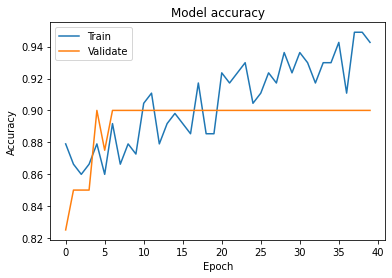

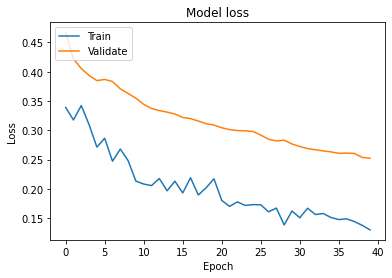

Epoch 1/40
10/10 [==============================] - 6s 102ms/step - accuracy: 0.5541 - student_loss: 0.6613 - distillation_loss: 0.1977 - val_accuracy: 0.7250 - val_student_loss: 0.4890
Epoch 2/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.7197 - student_loss: 0.5656 - distillation_loss: 0.1790 - val_accuracy: 0.7750 - val_student_loss: 0.4183
Epoch 3/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8280 - student_loss: 0.5298 - distillation_loss: 0.1747 - val_accuracy: 0.7750 - val_student_loss: 0.3606
Epoch 4/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8408 - student_loss: 0.4923 - distillation_loss: 0.1680 - val_accuracy: 0.7750 - val_student_loss: 0.3154
Epoch 5/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8344 - student_loss: 0.4518 - distillation_loss: 0.1612 - val_accuracy: 0.7750 - val_student_loss: 0.2850
Epoch 6/40
10/10 [==============================] - 0s 12ms/step - accurac

Model: "model_155"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_317 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_640 (TimeDist  (None, 10, 150, 8)  32          ['input_317[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_641 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_640[0][0]']   
 ributed)                                                                                 

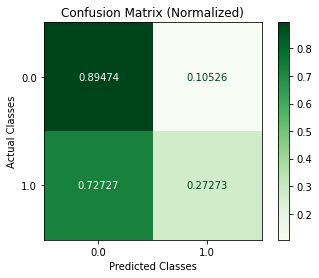

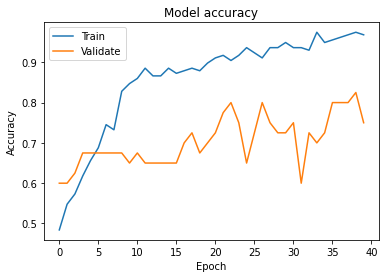

Model: "model_156"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_319 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_644 (TimeDist  (None, 10, 150, 8)  32          ['input_319[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_645 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_644[0][0]']   
 ributed)                                                                                 

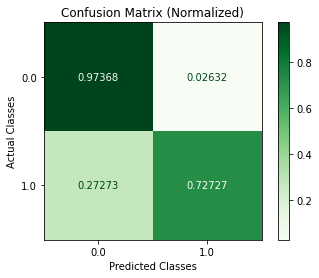

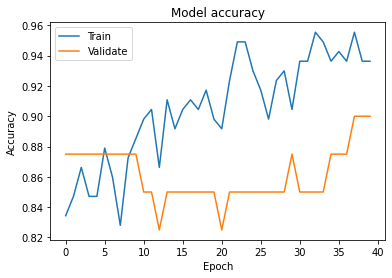

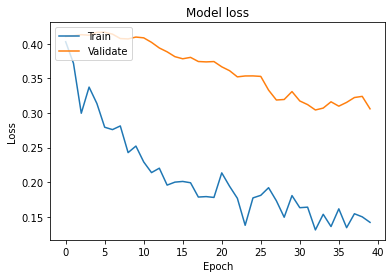

Epoch 1/40
10/10 [==============================] - 6s 102ms/step - accuracy: 0.7771 - student_loss: 0.5349 - distillation_loss: 0.1735 - val_accuracy: 0.6250 - val_student_loss: 0.4727
Epoch 2/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8535 - student_loss: 0.4561 - distillation_loss: 0.1595 - val_accuracy: 0.6250 - val_student_loss: 0.3817
Epoch 3/40
10/10 [==============================] - 0s 13ms/step - accuracy: 0.8599 - student_loss: 0.3991 - distillation_loss: 0.1539 - val_accuracy: 0.6750 - val_student_loss: 0.3143
Epoch 4/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8408 - student_loss: 0.4140 - distillation_loss: 0.1606 - val_accuracy: 0.6750 - val_student_loss: 0.2808
Epoch 5/40
10/10 [==============================] - 0s 12ms/step - accuracy: 0.8535 - student_loss: 0.3670 - distillation_loss: 0.1521 - val_accuracy: 0.6750 - val_student_loss: 0.2893
Epoch 6/40
10/10 [==============================] - 0s 12ms/step - accurac

Model: "model_157"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_321 (InputLayer)         [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_648 (TimeDist  (None, 10, 150, 8)  32          ['input_321[0][0]']              
 ributed)                                                                                         
                                                                                                  
 time_distributed_649 (TimeDist  (None, 10, 150, 8)  32          ['time_distributed_648[0][0]']   
 ributed)                                                                                 

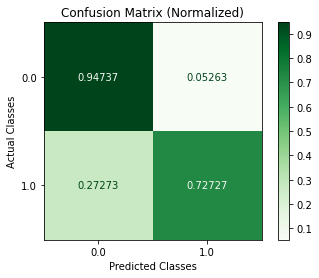

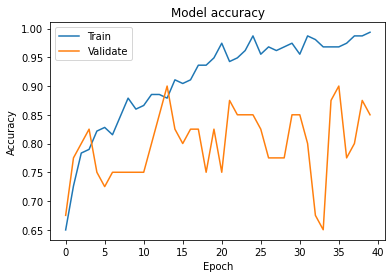

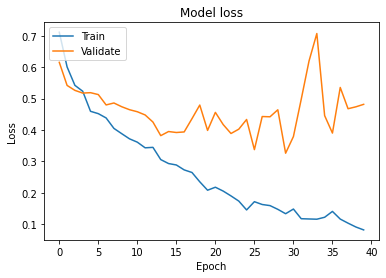

TEACHER METRICS-------------
{'Accuracy': '0.899+-0.03', 'Sensitivity': '0.742+-0.06', 'Specificity': '0.943+-0.03', 'F1-Score': '0.763+-0.07', 'MCC': '0.701+-0.09', 'AUC': [], 'PPV': '0.791+-0.1', 'NPV': '0.928+-0.02'}
DISTILLED METRICS-------------
{'Accuracy': '0.854+-0.03', 'Sensitivity': '0.613+-0.14', 'Specificity': '0.922+-0.06', 'F1-Score': '0.644+-0.08', 'MCC': '0.577+-0.08', 'AUC': [], 'PPV': '0.746+-0.16', 'NPV': '0.896+-0.03'}
STUDENT METRICS-------------
{'Accuracy': '0.842+-0.05', 'Sensitivity': '0.533+-0.2', 'Specificity': '0.927+-0.05', 'F1-Score': '0.58+-0.17', 'MCC': '0.504+-0.19', 'AUC': [], 'PPV': '0.685+-0.16', 'NPV': '0.879+-0.04'}


In [ ]:
kfold_knowledge(X_signals_binary, prv_data, y_ppg, summary=True, plotme=True, strat=5, binary=True)

# Visualization

In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 25.4 MB/s 
     |████████████████████████████████| 18.2 MB 24.0 MB/s 
     |████████████████████████████████| 76 kB 5.6 MB/s 
     |████████████████████████████████| 140 kB 65.6 MB/s 
     |████████████████████████████████| 837 kB 52.1 MB/s 
     |████████████████████████████████| 830 kB 48.5 MB/s 
     |████████████████████████████████| 822 kB 63.5 MB/s 
     |████████████████████████████████| 802 kB 48.9 MB/s 
     |████████████████████████████████| 802 kB 55.5 MB/s 
     |████████████████████████████████| 793 kB 62.4 MB/s 
     |████████████████████████████████| 793 kB 74.9 MB/s 
     |████████████████████████████████| 791 kB 64.9 MB/s 
     |████████████████████████████████| 786 kB 29.1 MB/s 
     |████████████████████████████████| 779 kB 16.0 MB/s 
     |████████████████████████████

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_34 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_68 (TimeDistr  (None, 10, 150, 32)  128        ['input_34[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_69 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_68[0][0]']    
 ibuted)                                                                                   

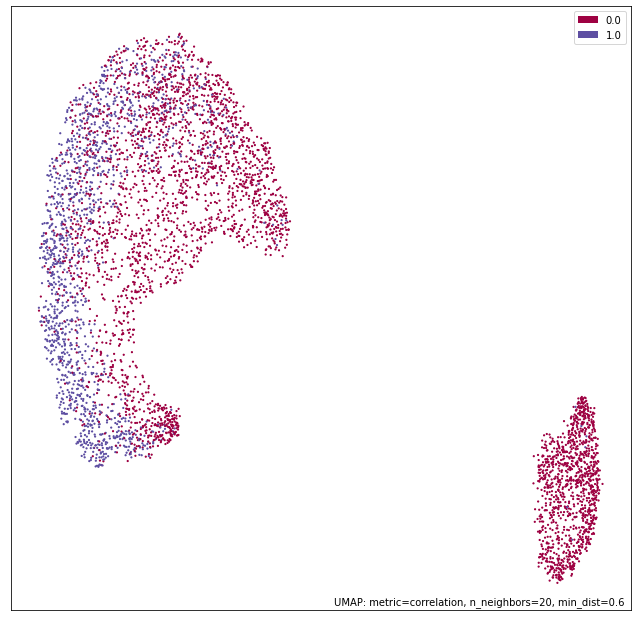

In [ ]:
import pycm
import umap
import umap.plot
x = X_signals_downsampled.reshape(X_signals_downsampled.shape[0], int(X_signals_downsampled.shape[1]/150), 150) #for LSTM
x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x, hrv_data, y, test_size=0.30, shuffle=False, random_state=42)
model = mm_cnn_bilstm_attn(x1_original, x2_original)
history = model.fit([x1_original,x2_original], y_original, epochs=5, batch_size=16, validation_split=0.2, verbose=1)
y_pred = model.predict([x1_holdout,x2_holdout])
y_pred = (y_pred > 0.5).astype("int32")
y_pred = np.ravel(y_pred) 
cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_holdout).astype(float), predict_vector=np.array(y_pred).astype(float))
concat = np.concatenate((x1_holdout.reshape(x1_holdout.shape[0], int(x1_holdout.shape[1]*150)), x2_holdout), axis=1)
mapper = umap.UMAP(n_neighbors=20,
                      min_dist=0.6,
                      metric='correlation').fit(concat)
umap.plot.points(mapper, labels=np.array(y_pred).astype(float))



In [ ]:
concat = np.concatenate((hrv_data, X_signals_downsampled), axis=1)

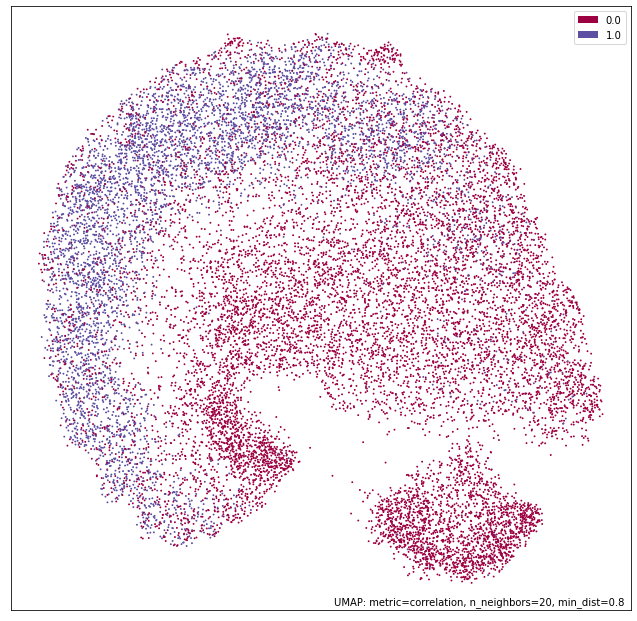

In [ ]:
import umap
import umap.plot
mapper = umap.UMAP(n_neighbors=20,
                      min_dist=0.8,
                      metric='correlation').fit(concat)
umap.plot.points(mapper, labels=y)

In [ ]:
concat2 = np.concatenate((prv_data, X_signals_binary), axis=1)

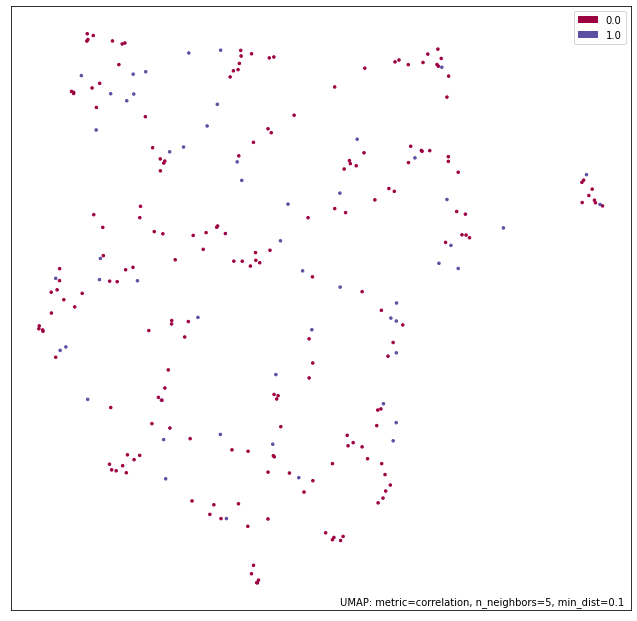

In [ ]:
import umap
import umap.plot
mapper = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit(concat2)
umap.plot.points(mapper, labels=y_ppg)

# Grad Cam


In [ ]:
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_34 (InputLayer)          [(None, 10, 150, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_68 (TimeDistr  (None, 10, 150, 32)  128        ['input_34[0][0]']               
 ibuted)                                                                                          
                                                                                                  
 time_distributed_69 (TimeDistr  (None, 10, 150, 32)  128        ['time_distributed_68[0][0]']    
 ibuted)                                                                                   

In [ ]:
def get_data(idx):
    return [np.expand_dims(x1_holdout[idx], axis=0), np.expand_dims(x2_holdout[idx], axis=0)]

In [ ]:
def make_gradcam_heatmap(inp, model, index):
    
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.layers[index].output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(inp)
        
    grads = tape.gradient(preds, last_conv_layer_output)

   
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output * pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy().sum(axis=-1).reshape(1, -1)

In [ ]:
def grad_cam(idx):
    pred = y_pred[idx]
    label = y_holdout[idx] 
    print('pred:', pred, 'label:', label)
    data = get_data(idx)
    heatmap = make_gradcam_heatmap(get_data(idx), model, -8)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim([-1.5, 1.5])
    ax.set_xlim([0, 1500])
    ax.set_title('GradCAM for ECG Instance {} in Training Set'.format(idx))
    ax.plot(x1_original[idx].reshape(1500), color='black')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.imshow(heatmap, extent=[*xlim, *ylim], cmap='Reds', alpha=0.8, aspect=100)
    plt.grid(False)
    plt.show()

pred: 0.0 label: 0.0


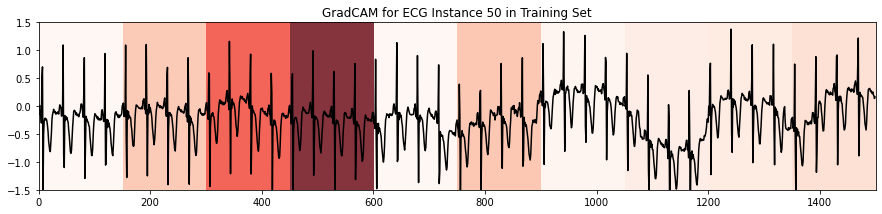

In [ ]:
grad_cam(50)

pred: 1.0 label: 1.0


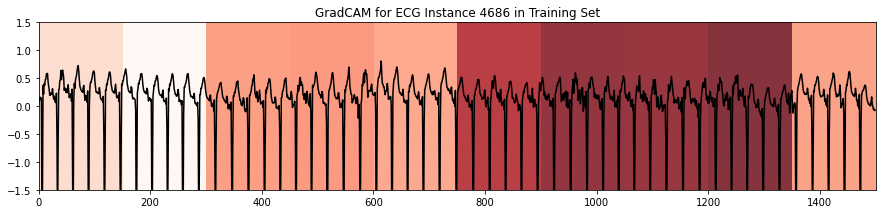

In [ ]:
grad_cam(4686)

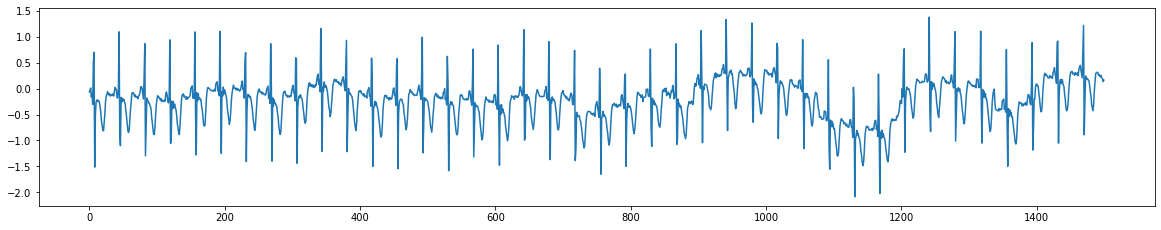

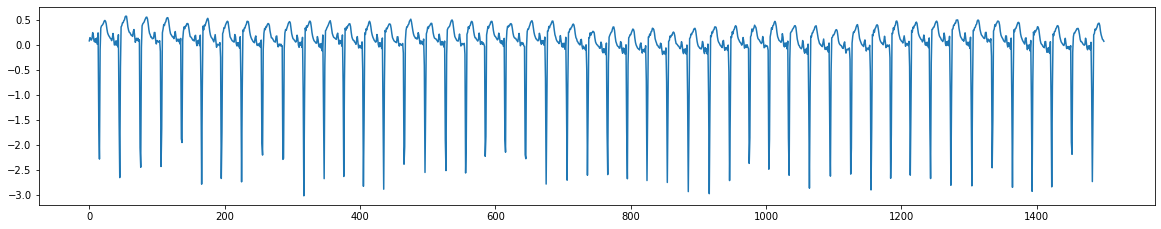

In [ ]:
plotme(x1_original[50].reshape(1500))
plotme(x1_original[4686].reshape(1500))

In [ ]:
y_pred = np.array(y_pred).astype(float)
from collections import Counter
counter = Counter(y_pred)
print("Train Labels"  +  str(counter))

itemindex = np.where(y_pred==1)
print(itemindex)

positive = np.where((y_pred==1) & (y_holdout==1))
print(positive)

Train LabelsCounter({1.0: 48, 0.0: 26})
(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 44, 45, 55, 56,
       57, 58, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]),)
(array([58, 60]),)


False
False
False
False
False
False
True
True
True
True
True
True
Epoch 1/40
20/20 [==============================] - 4s 55ms/step - loss: 20.6300 - accuracy: 0.4423 - val_loss: 8.9030 - val_accuracy: 0.2000
Epoch 2/40
20/20 [==============================] - 0s 8ms/step - loss: 15.6996 - accuracy: 0.3654 - val_loss: 7.4597 - val_accuracy: 0.2000
Epoch 3/40
20/20 [==============================] - 0s 8ms/step - loss: 11.8457 - accuracy: 0.3782 - val_loss: 5.6513 - val_accuracy: 0.2000
Epoch 4/40
20/20 [==============================] - 0s 7ms/step - loss: 8.0242 - accuracy: 0.3846 - val_loss: 3.2592 - val_accuracy: 0.3000
Epoch 5/40
20/20 [==============================] - 0s 12ms/step - loss: 4.9027 - accuracy: 0.4551 - val_loss: 2.7945 - val_accuracy: 0.2500
Epoch 6/40
20/20 [==============================] - 0s 11ms/step - loss: 2.3428 - accuracy: 0.5192 - val_loss: 2.3946 - val_accuracy: 0.1750
Epoch 7/40
20/20 [==============================] - 0s 11ms/step - loss: 1.4745 - accura

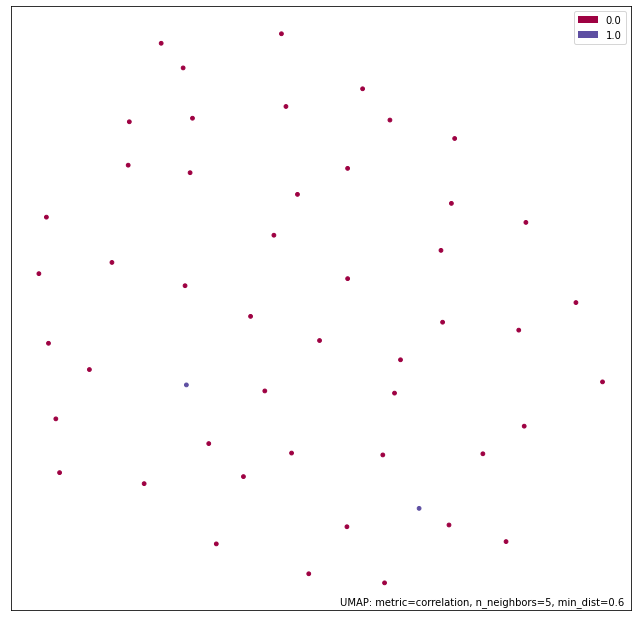

In [ ]:
import pycm
import umap
import umap.plot

model_name =  'new_cnn_hrv_95.14189514189513'
json_file = open('/content/drive/MyDrive/P13-ExplainHeart/{}.json'.format(model_name), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json, custom_objects={'Attention':Attention(return_sequences=False), 'TimeDistributed': TimeDistributed, 'Bidirectional': Bidirectional})
loaded_model.load_weights('/content/drive/MyDrive/P13-ExplainHeart/{}.h5'.format(model_name))
for layer in loaded_model.layers[:-6]:
  print(layer)
  layer.trainable = False
model = loaded_model
model.compile(loss='binary_crossentropy', 
        optimizer='adam',
        metrics =['accuracy'])
for layer in model.layers:
  print(layer.trainable)

x = X_signals_binary.reshape(X_signals_binary.shape[0], int(X_signals_binary.shape[1]/150), 150) #for LSTM
x1_original, x1_holdout, x2_original, x2_holdout, y_original, y_holdout = train_test_split(x, prv_data, y_ppg, test_size=0.20, shuffle=False, random_state=42)
history = loaded_model.fit([x1_original,x2_original], y_original, epochs=40, batch_size=8, validation_split=0.2, verbose=1)
y_pred = loaded_model.predict([x1_holdout,x2_holdout])
y_pred = (y_pred > 0.5).astype("int32")
y_pred = np.ravel(y_pred) 
cm1 = pycm.ConfusionMatrix(actual_vector=np.array(y_holdout).astype(float), predict_vector=np.array(y_pred).astype(float))
concat = np.concatenate((x1_holdout.reshape(x1_holdout.shape[0], int(x1_holdout.shape[1]*150)), x2_holdout), axis=1)
mapper = umap.UMAP(n_neighbors=5,
                      min_dist=0.6,
                      metric='correlation').fit(concat)
umap.plot.points(mapper, labels=np.array(y_pred).astype(float))


In [ ]:
def get_data(idx):
    return [np.expand_dims(x1_holdout[idx], axis=0), np.expand_dims(x2_holdout[idx], axis=0)]

In [ ]:
def make_gradcam_heatmap(inp, model, index):
    
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.layers[index].output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(inp)
        
    grads = tape.gradient(preds, last_conv_layer_output)

   
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output * pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy().sum(axis=-1).reshape(1, -1)

In [ ]:
def grad_cam(idx):
    pred = y_pred[idx]
    label = y_holdout[idx] 
    print('pred:', pred, 'label:', label)
    data = get_data(idx)
    heatmap = make_gradcam_heatmap(get_data(idx), model, -8)
    
    scaler = MinMaxScaler(feature_range=(-1.5, 1.5))
    sig = scaler.fit_transform(x1_original[idx].reshape(1500, 1))
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim([-1.5, 1.5])
    ax.set_xlim([0, 1500])
    ax.set_title('GradCAM for ECG Instance {} in Training Set'.format(idx))
    ax.plot(sig, color='black')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.imshow(heatmap, extent=[*xlim, *ylim], cmap='Blues', alpha=0.8, aspect=100)
    plt.grid(False)
    plt.show()

In [ ]:
y_pred = np.array(y_pred).astype(float)
from collections import Counter
counter = Counter(y_pred)
print("Train Labels"  +  str(counter))


positive = np.where((y_pred==0) & (y_holdout==0))
print(positive)
positive = np.where((y_pred==1) & (y_holdout==1))
print(positive)

Train LabelsCounter({0.0: 48, 1.0: 2})
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49]),)
(array([10, 15]),)


pred: 0.0 label: 0.0


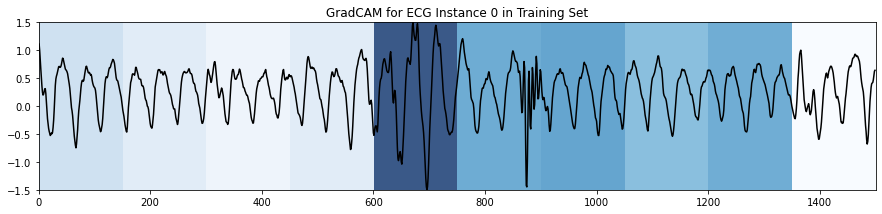

In [ ]:
grad_cam(0)

pred: 1.0 label: 1.0


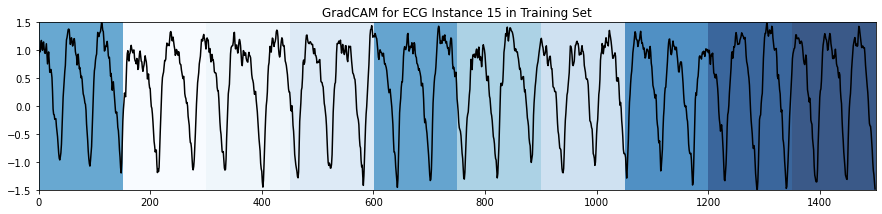

In [ ]:
grad_cam(15)

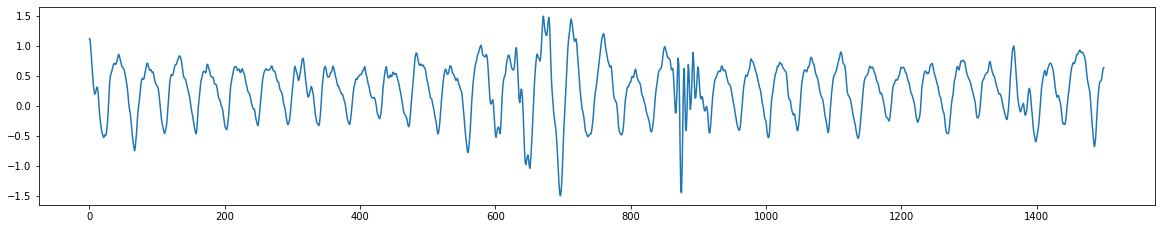

In [ ]:
scaler = MinMaxScaler(feature_range=(-1.5, 1.5))
sig = scaler.fit_transform(x1_original[0].reshape(1500, 1))
plotme(sig)
scaler = MinMaxScaler(feature_range=(-1.5, 1.5))
sig = scaler.fit_transform(x1_original[34].reshape(1500, 1))
plotme(sig)

# Shapley

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.2 MB/s 


In [ ]:
import shap
from sklearn.neural_network import MLPClassifier
shap.initjs()
%matplotlib inline

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
X has feature names, but MLPClassifier was fitted without feature names
Using 5000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy = 91.23741859088219%


  0%|          | 0/5067 [00:00<?, ?it/s]

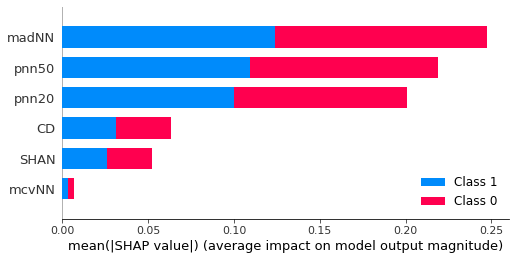

In [ ]:
import pycm


X = hrv_data
X = pd.DataFrame(X, columns=["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"])

x2_original, x2_holdout, y_original, y_holdout = train_test_split(X, y, test_size=0.30, shuffle=False, random_state=42)
nn = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(32, 2), random_state=0)
nn.fit(x2_original.values, y_original)
print("Accuracy = {0}%".format(100*np.sum(nn.predict(x2_holdout) == y_holdout)/len(y_holdout)))

explainer = shap.KernelExplainer(nn.predict_proba, x2_original[:5000])
shap_values = explainer.shap_values(x2_holdout,nsamples=1000)
shap.summary_plot(shap_values, x2_holdout,show=True, plot_size='auto')     


X has feature names, but MLPClassifier was fitted without feature names
Using 221 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy = 80.0%


  0%|          | 0/25 [00:00<?, ?it/s]

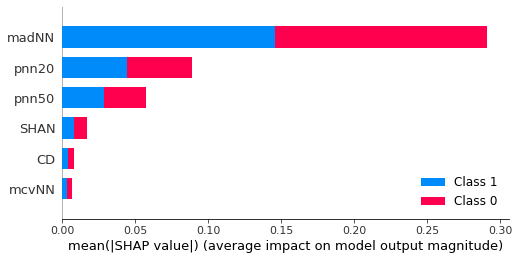

In [ ]:
import pycm
import umap
import umap.plot


X = prv_data
X = pd.DataFrame(X, columns=["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"])

x2_original, x2_holdout, y_original, y_holdout = train_test_split(X, y_ppg, test_size=0.10, shuffle=False, random_state=42)
nn = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(8, 2), random_state=0)
nn.fit(x2_original.values, y_original)
print("Accuracy = {0}%".format(100*np.sum(nn.predict(x2_holdout) == y_holdout)/len(y_holdout)))

explainer = shap.KernelExplainer(nn.predict_proba, x2_original)
shap_values = explainer.shap_values(x2_holdout, nsamples=50)
shap.summary_plot(shap_values,x2_holdout,show=True, plot_size='auto')     

# Statistical Analysis

In [ ]:
df = independent

In [ ]:
#Shapiro wilks

from scipy.stats import shapiro

from scipy.stats import mannwhitneyu,ttest_ind

from scipy.stats import  chisquare, chi2_contingency

def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value =  mannwhitneyu(distribution_1, distribution_2)
    # return u_statistic, p_value

    output = ''
    if(p_value > 0.05):
      output = 'Same'
      return output, p_value
    else:
      output = 'Different'
      return output, p_value



def shapiro_custom(distribution_1):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value =  shapiro(distribution_1)
    # return u_statistic, p_value

    output = ''
    if(p_value > 0.05):
      output = 'Normal'
      return output, p_value
    else:
      output = 'Abnormal'
      return output, p_value



def chi2_custom(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    crosstab_1 = pd.crosstab(distribution_1, columns="count")
    crosstab_2 = pd.crosstab(distribution_2, columns="count")

    observed = crosstab_2

    national_ratios = crosstab_1/len(crosstab_1)  # Get population ratios
    expected = national_ratios * len(distribution_2)   # Get expected counts


    chi2, p_value = chisquare(f_obs=crosstab_2, f_exp=crosstab_1)
    output = ''
    if(p_value > 0.05):
      output = 'Same'
      return output, p_value
    else:
      output = 'Different'
      return output, p_value

def dothettest(distribution_1, distribution_2):
    u_statistic, p_value =  ttest_ind(distribution_1, distribution_2)
    # return u_statistic, p_value

    output = ''
    if(p_value > 0.05):
      output = 'Same'
      return output, p_value
    else:
      output = 'Different'
      return output, p_value

samples_0 = hrv_excel[hrv_excel['Class']==0]
samples_1 = hrv_excel[hrv_excel['Class']==1]

# samples_0_cat = samples_0[cat_features]
samples_0_num = samples_0[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]]
# samples_1_cat = samples_1[cat_features]
samples_1_num = samples_1[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]]

print('Shapiro-Wilk')
for col in ["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]:
    print(col)
    print(shapiro_custom(samples_0_num[col]))
    print(shapiro_custom(samples_1_num[col]))

print('Mann-Whitney U-Test')
for col in ["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]:
    print(col)
    print(mann_whitney_u_test(samples_0_num[col], samples_1_num[col]))

print('Student T-Test Test')
for col in ["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]:
    print(col)
    print(dothettest(samples_0_num[col], samples_1_num[col]))





# print(pre_dummy.head())
# p_values = []
# for catcol in cat_features:
#     print(catcol)
#     print('----------------------------')
#     print(chi2_custom(samples_0_cat[catcol], samples_1_cat[catcol]))
#     print('----------------------------')



Shapiro-Wilk
madNN
('Abnormal', 6.507359234797505e-11)
('Abnormal', 0.0010340375592932105)
mcvNN
('Abnormal', 9.58507717641055e-10)
('Normal', 0.05849334970116615)
pnn50
('Abnormal', 4.894339274141846e-12)
('Normal', 0.9915330410003662)
pnn20
('Abnormal', 5.726791653740126e-13)
('Normal', 0.8956307172775269)
SHAN
('Abnormal', 3.565512607384136e-10)
('Normal', 0.1667318195104599)
CD
('Abnormal', 6.746158192072471e-07)
('Normal', 0.5102843046188354)
Mann-Whitney U-Test
madNN
('Different', 8.306176468147091e-16)
mcvNN
('Different', 6.028429709787076e-22)
pnn50
('Different', 1.0514610242649358e-10)
pnn20
('Different', 2.0269802087610954e-10)
SHAN
('Different', 1.9348386845636245e-18)
CD
('Different', 3.9137422272845244e-09)
Student T-Test Test
madNN
('Different', 6.512046884592111e-16)
mcvNN
('Different', 1.6469083458636605e-32)
pnn50
('Different', 1.07784077654518e-09)
pnn20
('Different', 1.3022983052674878e-08)
SHAN
('Different', 1.2165341130207636e-13)
CD
('Different', 3.342704337398962

In [ ]:
#Shapiro wilks

from scipy.stats import shapiro

from scipy.stats import mannwhitneyu

from scipy.stats import  chisquare, chi2_contingency

def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value =  mannwhitneyu(distribution_1, distribution_2)
    # return u_statistic, p_value

    output = ''
    if(p_value > 0.05):
      output = 'Same'
      return output, p_value
    else:
      output = 'Different'
      return output, p_value



def shapiro_custom(distribution_1):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value =  shapiro(distribution_1)
    # return u_statistic, p_value

    output = ''
    if(p_value > 0.05):
      output = 'Normal'
      return output, p_value
    else:
      output = 'Abnormal'
      return output, p_value



def chi2_custom(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    crosstab_1 = pd.crosstab(distribution_1, columns="count")
    crosstab_2 = pd.crosstab(distribution_2, columns="count")

    observed = crosstab_2

    national_ratios = crosstab_1/len(crosstab_1)  # Get population ratios
    expected = national_ratios * len(distribution_2)   # Get expected counts


    chi2, p_value = chisquare(f_obs=crosstab_2, f_exp=crosstab_1)
    output = ''
    if(p_value > 0.05):
      output = 'Same'
      return output, p_value
    else:
      output = 'Different'
      return output, p_value

samples_0 = independent[independent['Class']==0]
samples_1 = independent[independent['Class']==1]

# samples_0_cat = samples_0[cat_features]
samples_0_num = samples_0[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]]
# samples_1_cat = samples_1[cat_features]
samples_1_num = samples_1[["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]]

print('Shapiro-Wilk')
for col in ["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]:
    print(col)
    print(shapiro_custom(samples_0_num[col]))
    print(shapiro_custom(samples_1_num[col]))

print('Mann-Whitney U-Test')
for col in ["madNN", "mcvNN", "pnn50", "pnn20", "SHAN", "CD"]:
    print(col)
    print(mann_whitney_u_test(samples_0_num[col], samples_1_num[col]))

# print(pre_dummy.head())
# p_values = []
# for catcol in cat_features:
#     print(catcol)
#     print('----------------------------')
#     print(chi2_custom(samples_0_cat[catcol], samples_1_cat[catcol]))
#     print('----------------------------')

